## Case Fraude 

O problema das fraudes em cartões de crédito é uma das principais preocupações das instituições financeiras, já que essas fraudes podem causar **prejuízos significativos** para os consumidores e para as próprias instituições. Além disso, a detecção de fraudes pode ser um desafio, já que os fraudadores estão constantemente buscando maneiras de evadir os sistemas de segurança. Segundo dados da Serasa Experian, apenas no Brasil, cerca de **12,1 milhões de pessoas foram vítimas** de algum tipo de **fraude financeira** no último ano, representando um **prejuízo de 1,8 bilhão de reais** para os últimos 12 meses.

Detectar fraudes em cartões de crédito pode ser um desafio, já que as transações legítimas e as fraudulentas podem se parecer muito entre si. Além disso, as fraudes podem ocorrer em uma ampla gama de valores e locais, tornando difícil identificar um padrão. Isso pode levar a erros de detecção, tanto em falsos positivos (bloqueio preventivo do cartão do consumidor) quanto em falsos negativos (não detecção de uma transação fraudulenta).

<center>
<img src = "https://github.com/danielesantiago/FraudClassifier/blob/master/Arquivos/fraud.jpg?raw=true" width = "60%">
<a href="https://www.freepik.com/free-vector/cyber-fraud-with-desktop_60926711.htm#query=fraud&position=40&from_view=search&track=sph">Image by studiogstock</a> on Freepik
</center>

O objetivo deste projeto é realizar uma **análise exploratória dos dados** e construir **modelos de machine learning** capazes de **detectar transações fraudulentas com alta precisão**. Para isso, será necessário utilizar técnicas avançadas de análise de dados e machine learning para identificar padrões e anomalias nos dados, bem como técnicas de balanceamento de dados. Além disso, será importante avaliar a eficácia dos modelos construídos, tanto em termos de precisão na detecção de fraudes quanto em relação à quantidade de falsos positivos.

### Business Understanding

A fraude em transações é um ato de adquirir bens e serviços utilizando informações de pagamento roubadas. À medida que a adoção do cartão de crédito cresce, tanto em compras online quanto presenciais, as fraudes associadas a ele também se intensificam. É essencial para as empresas compreenderem esta ameaça, seus tipos e as métricas para monitorar e combater efetivamente tais atividades.

**Tipos de Fraude**:
1. **Fraude de Cartão de Crédito**: 
   - *Offline*: Usa-se um cartão físico roubado em locais como call centers.
   - *Online*: Ocorre na internet, telefone ou outros meios digitais sem a presença física do cartão.
   
2. **Fraude em Telecomunicações**: Uso indevido de serviços de telecomunicações para cometer fraudes. Pode afetar consumidores, empresas e provedores de serviços.

3. **Fraude em Computadores**: Inclui intrusões não autorizadas em sistemas para obter dados ou causar danos.

4. **Outros Tipos**:
   - Fraude de Falência
   - Fraude de Furto/Contrafação
   - Fraude de Aplicação
   - Fraude Comportamental

**Principais KPIs (Indicadores Chave de Desempenho) de Fraude**:
1. **Aceitação**: Volume de transações aceitas após autorização e triagem.
2. **Desafios**: Transações potencialmente fraudulentas que são sinalizadas para revisão manual.
3. **Negações**: Solicitações de pagamento rejeitadas pelo adquirente ou identificadas como fraude antes do processamento.
4. **Chargebacks**: Transações que o adquirente identifica como fraude ou que o cliente contesta.
5. **Falsos Positivos**: Transações legítimas de clientes bloqueadas incorretamente como fraude.

Para um desempenho eficaz de gerenciamento de fraudes, é fundamental monitorar todos esses KPIs. Taxas elevadas de falsos positivos, por exemplo, podem resultar em vendas perdidas e clientes frustrados. Portanto, além de se proteger contra fraudes, as empresas devem garantir que suas soluções de detecção de fraudes não afastem clientes legítimos.

**Métricas de Business**:
Para esse projeto, sabe-se que a empresa ganha 10% do valor de um pagamento corretamente aprovado e perde 100% em caso de fraude:
- **Taxa de Fraude** = ($ transações fraudulentas aprovadas) / ($ transações totais aprovadas)
- **Taxa de Aprovação** = ($ transações totais aprovadas) / ($ transações recebidas)

### Importando os pacotes necessários

In [3]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow 

# Visualização de dados
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import missingno

# Testes estatísticos
from scipy.stats import chi2_contingency, mannwhitneyu
import scipy.stats as stats

# Modelos de machine learning e utilitários
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import (roc_curve, auc, confusion_matrix, log_loss, roc_auc_score,
                             precision_score, recall_score, f1_score, make_scorer)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# Classificadores e métodos de ensemble
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("C:/Users/danie/FraudClassifier/data/raw/dados.xlsx")

## **Análise dos Dados**

Esta seção fornece uma visão detalhada da estrutura e do significado dos dados que estão sendo analisados.

#### **Dicionário de Variáveis**

- **`score_1` a `score_10`**: 
  - Descrição: Notas de bureau de crédito.
  - Finalidade: Utilizadas para avaliar a confiabilidade do comprador.
  
- **`Pais`**: 
  - Descrição: País onde a compra foi realizada.

- **`Produto`**: 
  - Descrição: Item específico adquirido no e-commerce.

- **`Categoria_produto`**: 
  - Descrição: Classificação do produto dentro do e-commerce.

- **`Entrega_doc_1` a `entrega_doc_3`**: 
  - Descrição: Indicadores de entrega de documentos no momento de criação da conta.
  - Valores: 
    - **0** ou **N**: Não entregou.
    - **1** ou **Y**: Entregou.
    - Vazio: Considerei como não entregou.

- **`Score_fraude_modelo`**: 
  - Descrição: Probabilidade, fornecida pelo modelo atual, de uma compra ser fraudulenta.
  - Valores: Varia de 0 a 100. Quanto mais próximo de 100, maior a confiança do modelo de que a transação é fraudulenta.

- **`Fraude`**: 
  - Descrição: Verificação de autenticidade da compra.
  - Valores: 
    - **0**: Transação legítima.
    - **1**: Transação fraudulenta.
  - Observação: Esta informação é confirmada alguns dias após a transação para garantir precisão.



### Análise exploratória dos dados

In [3]:
# Ver as cinco primeiras entradas
df.head()

score_1  score_2    score_3  score_4   score_5  score_6 pais  score_7  \
0        4   0.7685   94436.24     20.0  0.444828      1.0   BR        5   
1        4   0.7550    9258.50      1.0  0.000000     33.0   BR        0   
2        4   0.7455  242549.09      3.0  0.000000     19.0   AR       23   
3        4   0.7631   18923.90     50.0  0.482385     18.0   BR       23   
4        2   0.7315    5728.68     15.0  0.000000      1.0   BR        2   

                                             produto categoria_produto  \
0  Máquininha Corta Barba Cabelo Peito Perna Pelo...       cat_8d714cd   
1  Avental Descartavel Manga Longa  - 50 Un. Tnt ...       cat_64b574b   
2  Bicicleta Mountain Fire Bird Rodado 29 Alumini...       cat_e9110c5   
3  Caneta Delineador Carimbo Olho Gatinho Longo 2...       cat_d06e653   
4           Resident Evil Operation Raccoon City Ps3       cat_6c4cfdc   

    score_8  score_9  score_10  entrega_doc_1 entrega_doc_2 entrega_doc_3  \
0  0.883598    240.0     102.0              1           NaN             N   
1  0.376019   4008.0       0.0              1             Y             N   
2  0.516368   1779.0      77.0              1           NaN             N   
3  0.154036   1704.0    1147.0              1           NaN             Y   
4  0.855798   1025.0     150.0              1           NaN             N   

          data_compra  valor_compra  score_fraude_modelo  fraude  
0 2020-03-27 11:51:16          5.64                   66       0  
1 2020-04-15 19:58:08        124.71                   72       0  
2 2020-03-25 18:13:38        339.32                   95       0  
3 2020-04-16 16:03:10          3.54                    2       0  
4 2020-04-02 10:24:45          3.53                   76       0

É possível notar que:
* Algumas variáveis estão anônimas, para garantir a privacidade do usuário.
* Há variável contendo texto, em `produto`.
* `entrega_doc_2`possui valores nulos.
* Possuímos a data e hora da compra na feature `data_compra`.
* `score_fraude_modelo` é o score do modelo anterior que servirá de baseline, e não deve entrar nas features do modelo novo.

In [4]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Entradas: 150000
Colunas: 20


In [5]:
# Extrair nome das colunas
df.columns

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'pais', 'score_7', 'produto', 'categoria_produto', 'score_8', 'score_9',
       'score_10', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3',
       'data_compra', 'valor_compra', 'score_fraude_modelo', 'fraude'],
      dtype='object')

In [6]:
# Extrair o tipo das variáveis
df.dtypes

score_1                         int64
score_2                       float64
score_3                       float64
score_4                       float64
score_5                       float64
score_6                       float64
pais                           object
score_7                         int64
produto                        object
categoria_produto              object
score_8                       float64
score_9                       float64
score_10                      float64
entrega_doc_1                   int64
entrega_doc_2                  object
entrega_doc_3                  object
data_compra            datetime64[ns]
valor_compra                  float64
score_fraude_modelo             int64
fraude                          int64
dtype: object

In [7]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0] * 100).round(2)

score_1                 0.00
score_2                 8.66
score_3                 8.66
score_4                 0.24
score_5                 0.00
score_6                 0.01
pais                    0.13
score_7                 0.00
produto                 0.00
categoria_produto       0.00
score_8                 0.00
score_9                 0.01
score_10                0.24
entrega_doc_1           0.00
entrega_doc_2          72.57
entrega_doc_3           0.00
data_compra             0.00
valor_compra            0.00
score_fraude_modelo     0.00
fraude                  0.00
dtype: float64

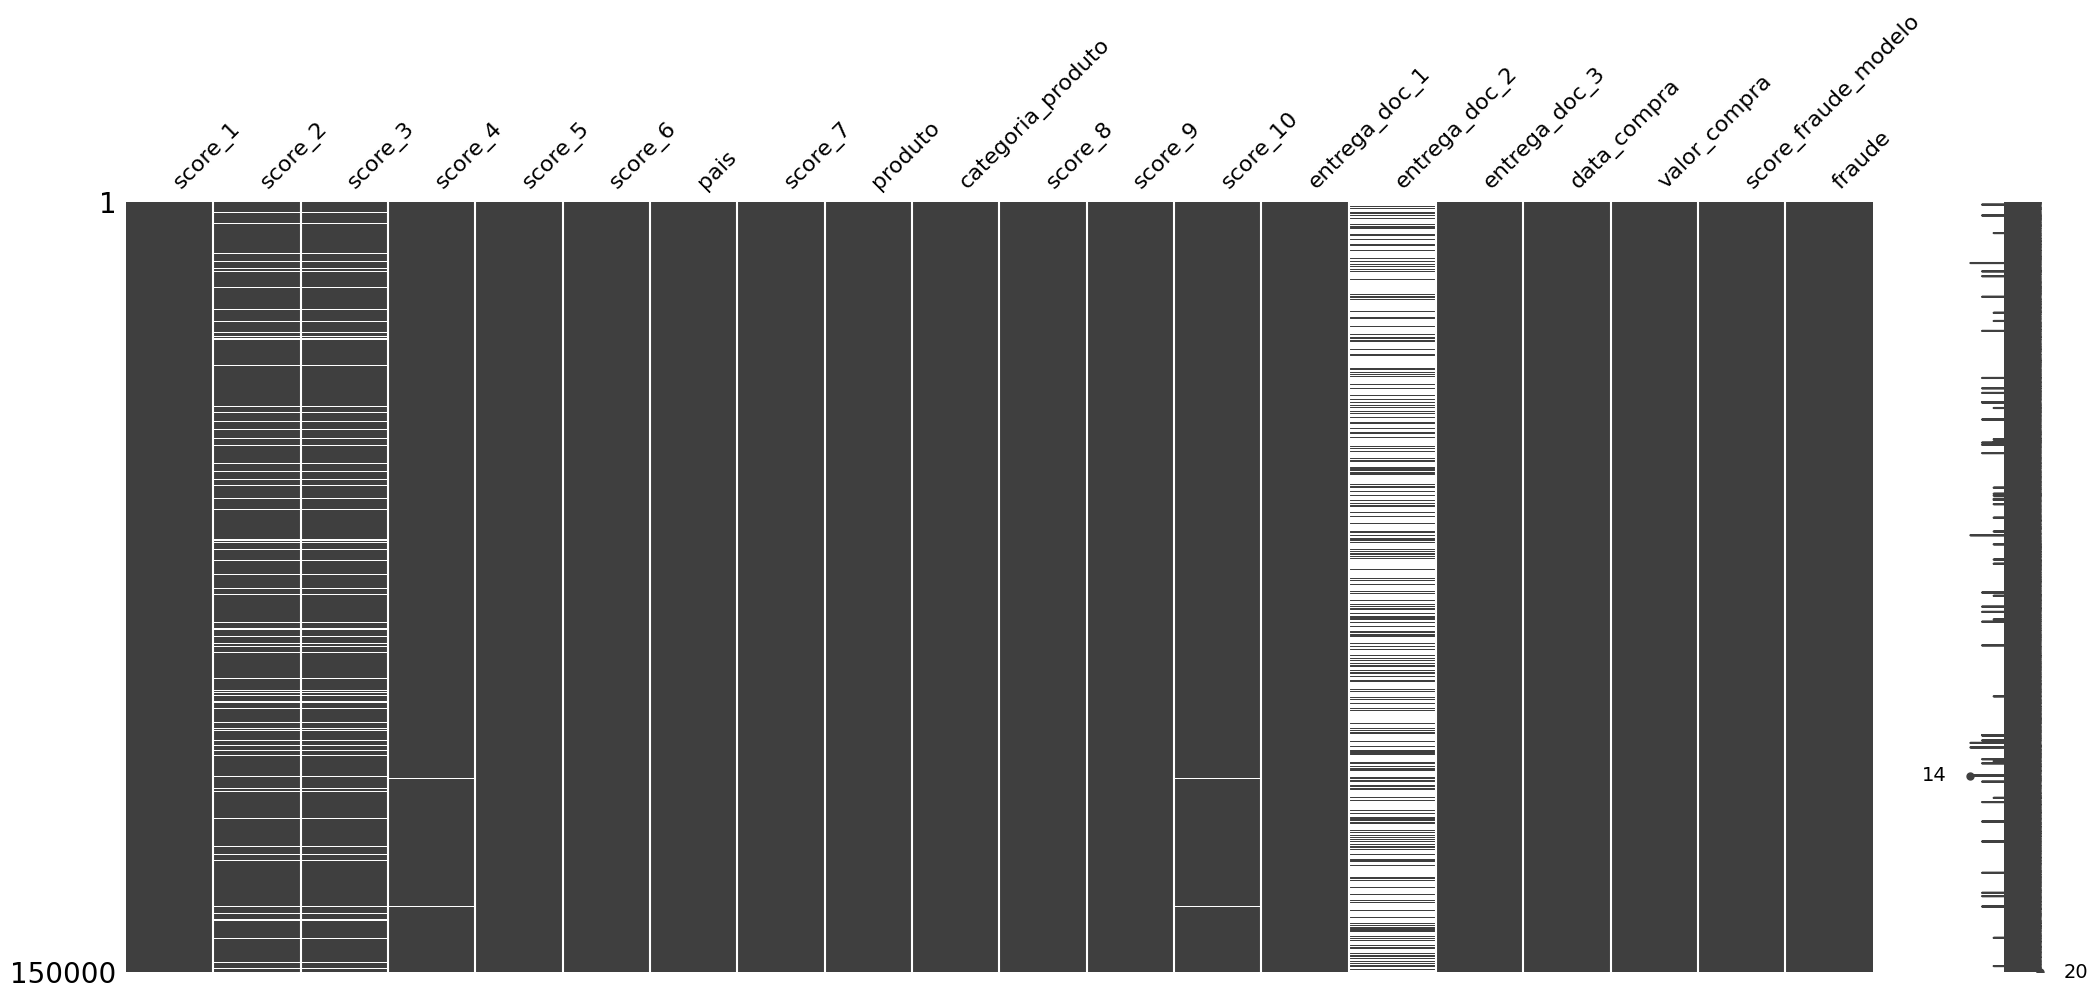

In [8]:
missingno.matrix(df);

A coluna `entrega_doc_2` como vislumbrado anteriormente possui 72% dos itens nulos. O nulo, neste caso, pode representar pessoas que não entregaram os documentos. porém essa falta de entrega pode ajudar a detectar possiveis fraudadores. Nesses casos, é interessante criar uma nova feature (coluna) booleana indicando se o documento foi ou não entregue (1: entregue, 0: preenchimento nulo).


### ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA

#### Variáveis categóricas

Como a variável `score_1` varia de 1 a 4, irei assumir que a mesma é categórica. Abaixo, segue um gráfico de barras.

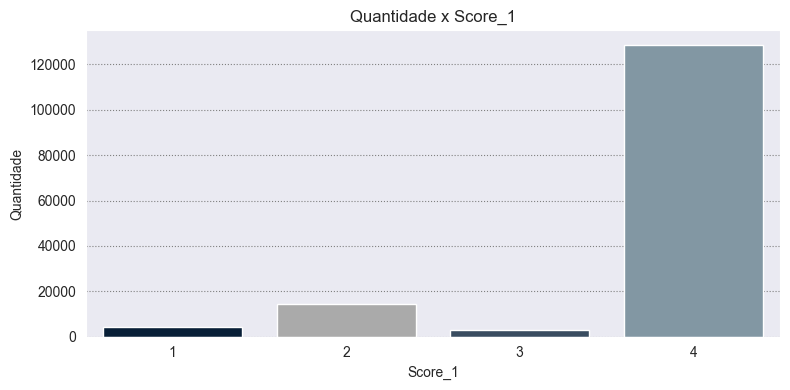

In [9]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = df.score_1.value_counts
sns.countplot(x='score_1', data = df)
ax.set_xlabel("Score_1")
ax.set_ylabel("Quantidade")
ax.set_title("Quantidade x Score_1")
plt.tight_layout();

É possível observar que a maioria dos usuários está contida na categoria 4.

In [10]:
df.score_1.loc[df.fraude == 1].value_counts()/df.loc[df.fraude == 1].shape[0]

4    0.763867
2    0.149067
1    0.052667
3    0.034400
Name: score_1, dtype: float64

De modo semelhante, a maioria das fraudes está alocada nas categorias 4 e 2.Veremos agora a cardinalidade da variável `país`.

In [11]:
df.pais.value_counts()

BR    111628
AR     31964
UY      2967
US      2273
SE       358
MX       236
RU        73
ES        69
CO        64
GB        43
FR        18
IT        14
PT        13
DE         9
CL         9
PE         5
EC         4
PY         4
AU         3
PA         3
CA         3
UA         3
BE         3
CN         3
CH         3
NZ         3
PR         2
NL         2
BO         2
CR         2
AE         2
LB         2
FI         1
TW         1
NO         1
EG         1
IL         1
PH         1
JP         1
GH         1
NI         1
DO         1
BS         1
TR         1
IN         1
GR         1
HN         1
KR         1
GE         1
AD         1
ZA         1
Name: pais, dtype: int64

In [12]:
(df.pais.value_counts()/df.shape[0] * 100).round(2)

BR    74.42
AR    21.31
UY     1.98
US     1.52
SE     0.24
MX     0.16
RU     0.05
ES     0.05
CO     0.04
GB     0.03
FR     0.01
IT     0.01
PT     0.01
DE     0.01
CL     0.01
PE     0.00
EC     0.00
PY     0.00
AU     0.00
PA     0.00
CA     0.00
UA     0.00
BE     0.00
CN     0.00
CH     0.00
NZ     0.00
PR     0.00
NL     0.00
BO     0.00
CR     0.00
AE     0.00
LB     0.00
FI     0.00
TW     0.00
NO     0.00
EG     0.00
IL     0.00
PH     0.00
JP     0.00
GH     0.00
NI     0.00
DO     0.00
BS     0.00
TR     0.00
IN     0.00
GR     0.00
HN     0.00
KR     0.00
GE     0.00
AD     0.00
ZA     0.00
Name: pais, dtype: float64

In [13]:
len(df.pais.unique())

52

In [14]:
# fraude por país
df.pais.loc[df.fraude == 1].value_counts()/df.loc[df.fraude == 1].shape[0]

BR    0.821600
AR    0.157200
US    0.009333
UY    0.003867
SE    0.002000
RU    0.000800
ES    0.000667
MX    0.000400
FR    0.000400
DE    0.000400
EC    0.000267
NL    0.000267
KR    0.000133
CO    0.000133
NZ    0.000133
FI    0.000133
CL    0.000133
PT    0.000133
Name: pais, dtype: float64

Há 52 países no dataset, onde Brasil e Argentina representam mais de 90% do dataset.

Vejamos agora em relação à feature `produto`.

In [15]:
df.produto.value_counts()

Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     83
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram         51
Clean Sept - Álcool Em Gel 70% 500 Ml                           49
Tapete Ilustrativo Pista Carrinho Hot Wheels 0,60x1,20m         47
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un    47
                                                                ..
Bateria Zetta, Nova, Com Nota Fiscal, 12 Mês De Garantia         1
Dispenser Jabón Liquido / Alcohol En Gel X Unidad                1
Moletom Gola Redonda Shawn Mendes Top 98 Unissex Promoção        1
Placa Interface Adesivo Lavadora Brastemp Bwl11 Emicol Biv.      1
A Magia Divina Das Velas. O Livro Das Sete Chamas Sagradas       1
Name: produto, Length: 127804, dtype: int64

In [16]:
len(df.produto.unique())

127804

A alta cardinalidade pode ser muito prejudicial para o modelo pois existem grandes chances dessas determinadas features não discriminarem padrões, e, portanto, não agregar nada ao modelo. Além disso, a alta cardinalidade pode deixar os dados muito esparsos, afetando a performance do modelo


A fim de entender melhor e adquirir uma intuição, plotarei uma nuvem de palavras para `produto`.

In [17]:
# ver a quantidade de valores ausentes
print("Valores ausentes para produto: ", df.produto.isnull().sum())

# eliminar as colunas com valores ausentes
produto = df.dropna(subset=['produto'], axis=0)['produto']

Valores ausentes para produto:  0


In [18]:
# Concatenar todas as descrições de produtos em uma única string
all_produto = " ".join(df["produto"].astype(str))

# Contar o número de palavras na string concatenada
num_palavras = len(all_produto.split())

print("Quantidade de Palavras: {}".format(num_palavras))


Quantidade de Palavras: 1315166


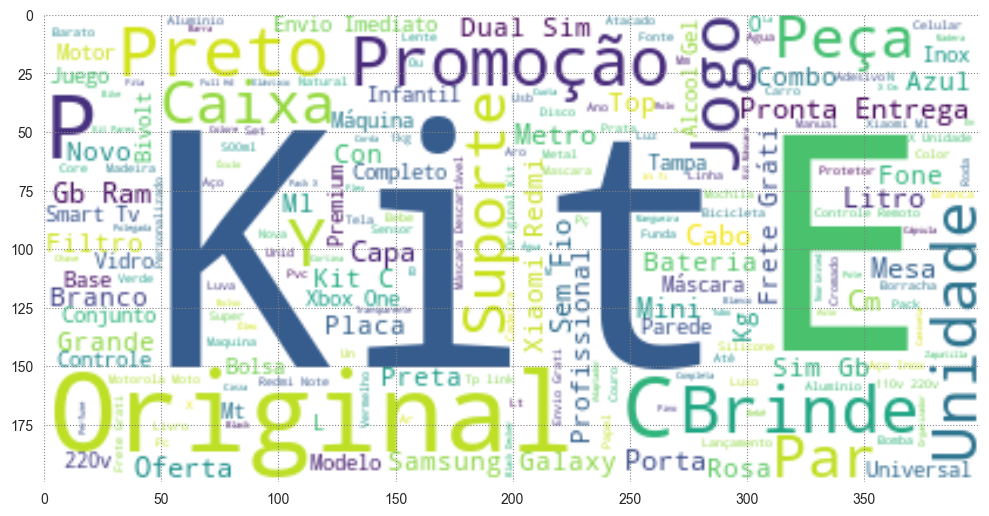

In [19]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "br", "para"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(all_produto)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Vejamos agora em relação à variável `categoria_produto`

In [20]:
df.categoria_produto.value_counts()

cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
cat_4249bd8    1191
               ... 
cat_0d1c81b       1
cat_4fc8b8b       1
cat_9ba475f       1
cat_75e1eaf       1
cat_45b507c       1
Name: categoria_produto, Length: 8324, dtype: int64

In [21]:
len(df.categoria_produto.unique())

8324

categoria_produto  counter  fraude  percent_cumsum_fraude
0         cat_43b9c10     2331     380               5.066667
1         cat_d69bed9     1799      54               5.786667
2         cat_604df77     1784      71               6.733333
3         cat_6c4cfdc     1449      74               7.720000
4         cat_4249bd8     1191      98               9.026667
..                ...      ...     ...                    ...
995       cat_e62cf2d       29       0              79.973333
996       cat_d7c8a47       29       2              80.000000
997       cat_1a13152       29       1              80.013333
998       cat_c766714       29       1              80.026667
999       cat_e189df3       29       3              80.066667

[1000 rows x 4 columns]

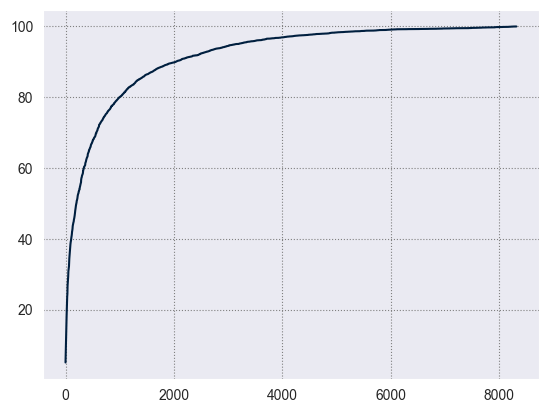

In [22]:
#deep dive na categoria
item_por_categoria = df.categoria_produto.value_counts().reset_index().rename(columns = {"index": "categoria_produto", "categoria_produto":"counter"})
fraude_por_categoria = df.groupby(['categoria_produto']).fraude.sum().reset_index()
df_item_fraude = pd.merge(item_por_categoria, fraude_por_categoria, on = ['categoria_produto'], how = "left")

df_item_fraude['percent_cumsum_fraude'] = df_item_fraude['fraude'].cumsum()/df.fraude.sum()*100

display(df_item_fraude[0:1000]) #80% das fraudes concentradas em 12% das categorias
df_item_fraude['percent_cumsum_fraude'].plot();

Há mais de 8 mil categorias diferentes para cada produto. Uma ressalva importante é que poderiamos agrupar essas subcategorias em categorias maiores, diminuindo assim a cardinalidade (ex: vestuário, produtos eletrônicos, etc). Essa informação não está disponível no dataset, mas caso haja, poderia ser extraída de outras bases. Caso não haja em outras bases, poderia ser criado um widget para que o vendedor pudesse classificar o produto de forma mais macro e, se ainda assim isso não fosse possível, poderíamos criar um modelo de NLP e classificação que fosse capaz de entender as possíveis classes macro do produto, ou ainda um modelo não supervisionado de clusterização com informações que discriminem o produto (preço, perfil de cliente que efetua compra, etc). 



Vejamos em relação à variável `entrega_doc_1`

In [23]:
df.entrega_doc_1.value_counts()

1    135353
0     14647
Name: entrega_doc_1, dtype: int64

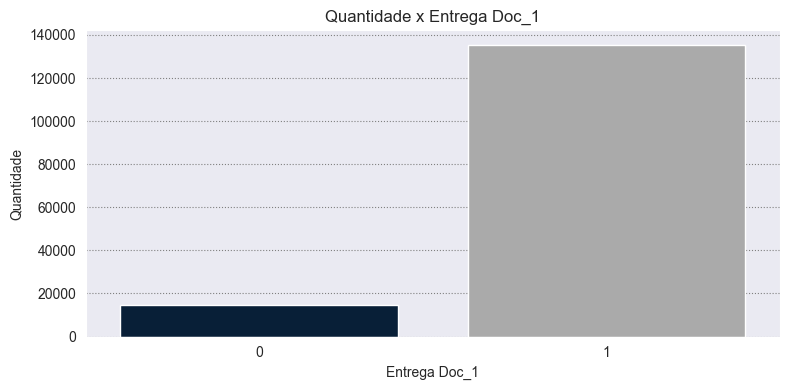

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = df.score_1.value_counts
sns.countplot(x='entrega_doc_1', data = df)
ax.set_xlabel("Entrega Doc_1")
ax.set_ylabel("Quantidade")
ax.set_title("Quantidade x Entrega Doc_1")
plt.tight_layout();

Há um desbalanceamento, onde a maioria dos usuários entregaram o documento 1.

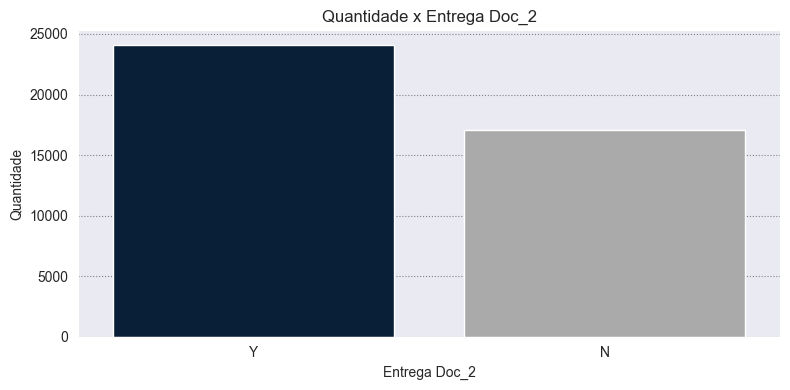

In [25]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = df.score_1.value_counts
sns.countplot(x='entrega_doc_2', data = df)
ax.set_xlabel("Entrega Doc_2")
ax.set_ylabel("Quantidade")
ax.set_title("Quantidade x Entrega Doc_2")
plt.tight_layout();

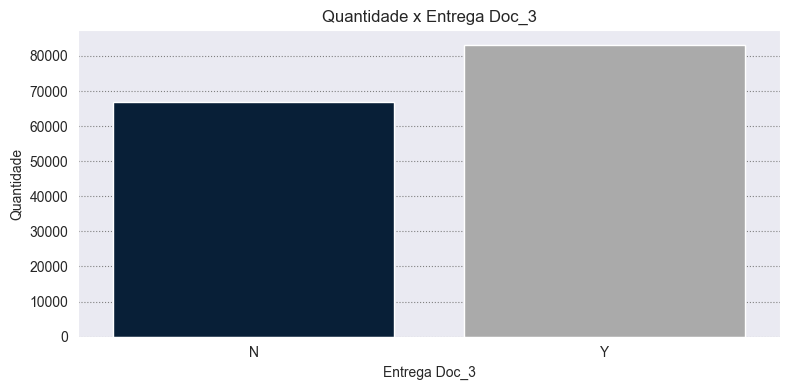

In [26]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = df.score_1.value_counts
sns.countplot(x='entrega_doc_3', data = df)
ax.set_xlabel("Entrega Doc_3")
ax.set_ylabel("Quantidade")
ax.set_title("Quantidade x Entrega Doc_3")
plt.tight_layout();

Por fim, a maioria dos usuários realizaram a entrega do documento 3.

Vejamos agora o balanceamento da **variável alvo** `fraude`.

In [27]:
# Quantidade de dados distribuidos pela variável alvo
df.fraude.value_counts()

0    142500
1      7500
Name: fraude, dtype: int64

In [28]:
# Quantidade de dados distribuidos pela variável alvo
round(df.fraude.value_counts()/df.shape[0],2)

0    0.95
1    0.05
Name: fraude, dtype: float64

Pode-se perceber que o dataset é altamente **desbalanceado**, contendo 95% das transações não fraudulentas e apenas 5% fraudulentas.

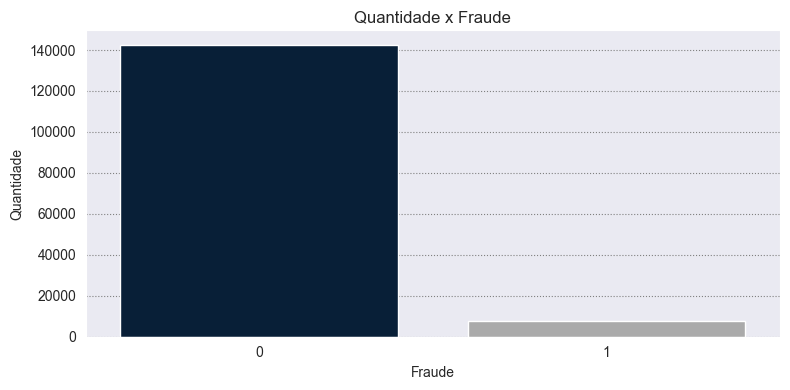

In [29]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = df.fraude.value_counts
sns.countplot(x='fraude', data = df)
ax.set_xlabel("Fraude")
ax.set_ylabel("Quantidade")
ax.set_title("Quantidade x Fraude")
plt.tight_layout();

#### Variáveis numéricas

Primeiramente irei plotar as estatísticas das variáveis.

In [30]:
df.describe()

score_1        score_2       score_3        score_4  \
count  150000.000000  137016.000000  1.370160e+05  149635.000000   
mean        3.705407       0.728115  2.604451e+05      21.677669   
std         0.753206       0.132943  8.464361e+05      20.062146   
min         1.000000       0.000000  1.600000e-01       0.000000   
25%         4.000000       0.678400  9.679915e+03       2.000000   
50%         4.000000       0.755500  4.371165e+04      14.000000   
75%         4.000000       0.806500  1.454436e+05      50.000000   
max         4.000000       1.000000  1.387874e+07      50.000000   

             score_5        score_6        score_7        score_8  \
count  150000.000000  149989.000000  150000.000000  150000.000000   
mean        0.220641      51.169352      14.193513       0.497532   
std         2.434995     709.472904      14.161216       0.288348   
min         0.000000      -5.000000       0.000000       0.000004   
25%         0.000000       1.000000       3.000000       0.246819   
50%         0.104875       8.000000       9.000000       0.495990   
75%         0.282938      33.000000      21.000000       0.746508   
max       833.333333  145274.000000      58.000000       0.999995   

             score_9       score_10  entrega_doc_1   valor_compra  \
count  149989.000000  149635.000000  150000.000000  150000.000000   
mean     2305.409403     299.969579       0.902353      43.523134   
std      1712.379601     321.075806       0.296837      91.557888   
min         0.000000       0.000000       0.000000       0.020000   
25%       910.000000      42.000000       1.000000       9.380000   
50%      1937.000000     193.000000       1.000000      20.610000   
75%      3445.000000     459.000000       1.000000      40.692500   
max      7544.000000    2225.000000       1.000000    3696.350000   

       score_fraude_modelo         fraude  
count        150000.000000  150000.000000  
mean             48.066240       0.050000  
std              28.995122       0.217946  
min               0.000000       0.000000  
25%              23.000000       0.000000  
50%              48.000000       0.000000  
75%              73.000000       0.000000  
max             100.000000       1.000000

É possível perceber que `score_6` possui uma discrepância muito grande enquanto ao valor. Trata-se possivelmente de um outlier, mas como não há informações acerca de ser um valor válido ou não, ele será mantido. Abaixo será plotado histogramas.

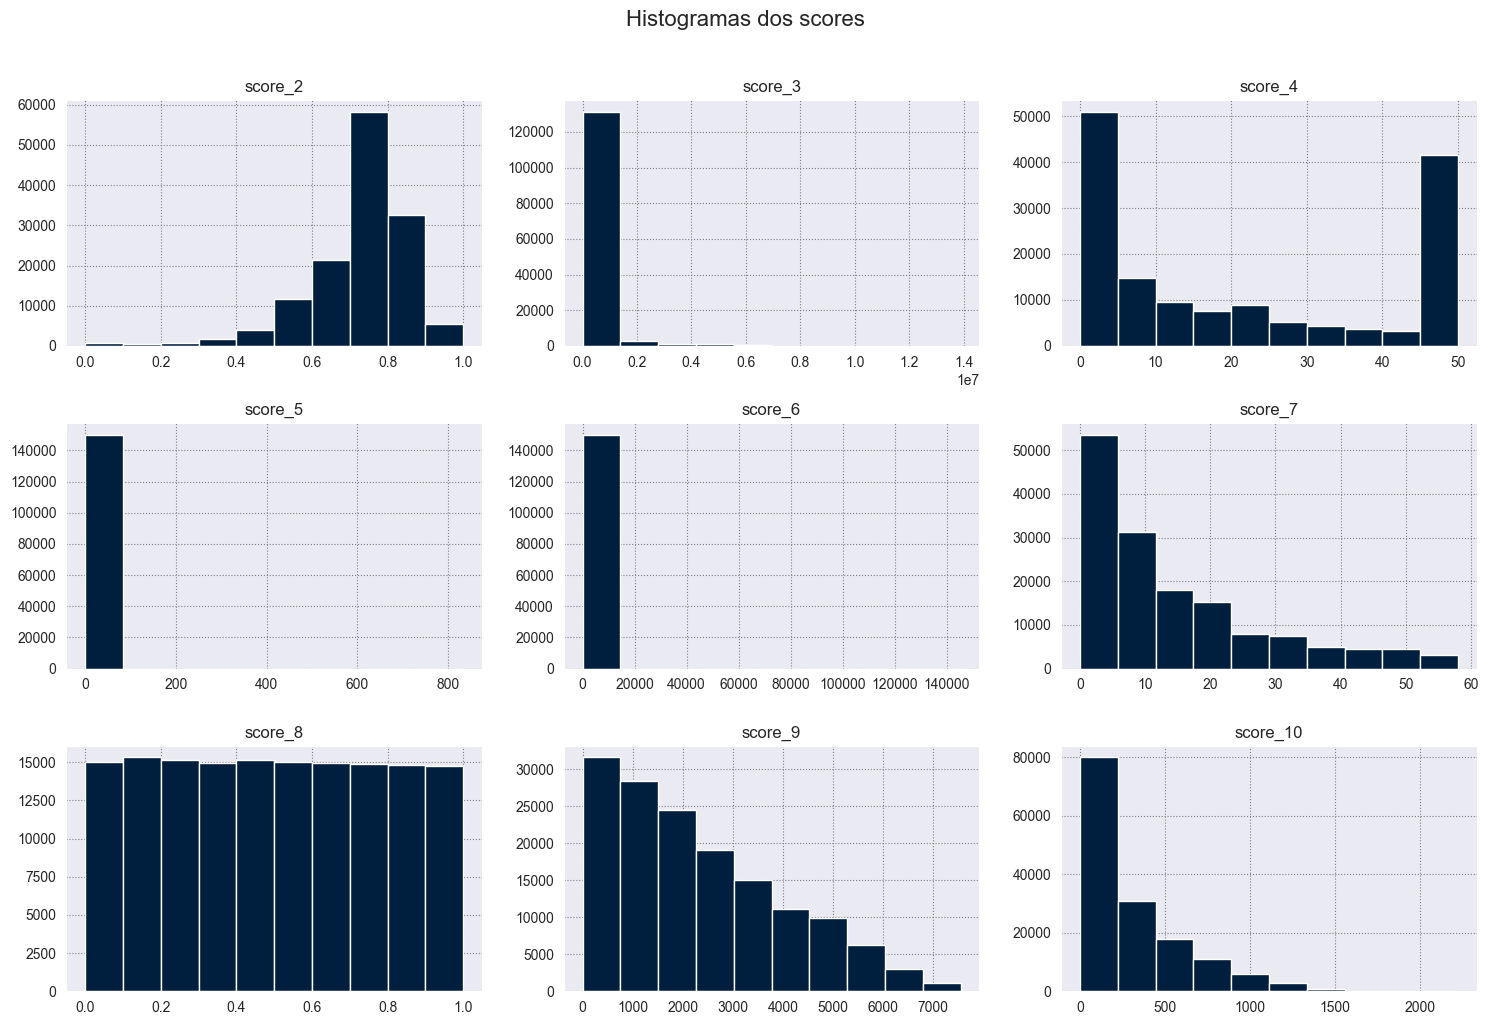

In [31]:
# Gera os histogramas
axarr = df[['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10']].hist(figsize=(15, 10))

# Adiciona um título geral para a figura
plt.gcf().suptitle("Histogramas dos scores", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


Pode-se perceber que:
* `score_2` obtem uma assimetria à esquerda, ou seja, mais pessoas possuem uma pontuação alta.
* `score_7`, `score_9`, `score_10` possuem assimetria à direita, mais pessoas possuem uma pontuação mais baixa.
* `score_8` é uniforme.
* `score_4` possui dois picos no início e final.
* Os demais scores não estão discriminando bem e possuem grande amplitude.

Vejamos agora se as variáveis estão correlacionadas.

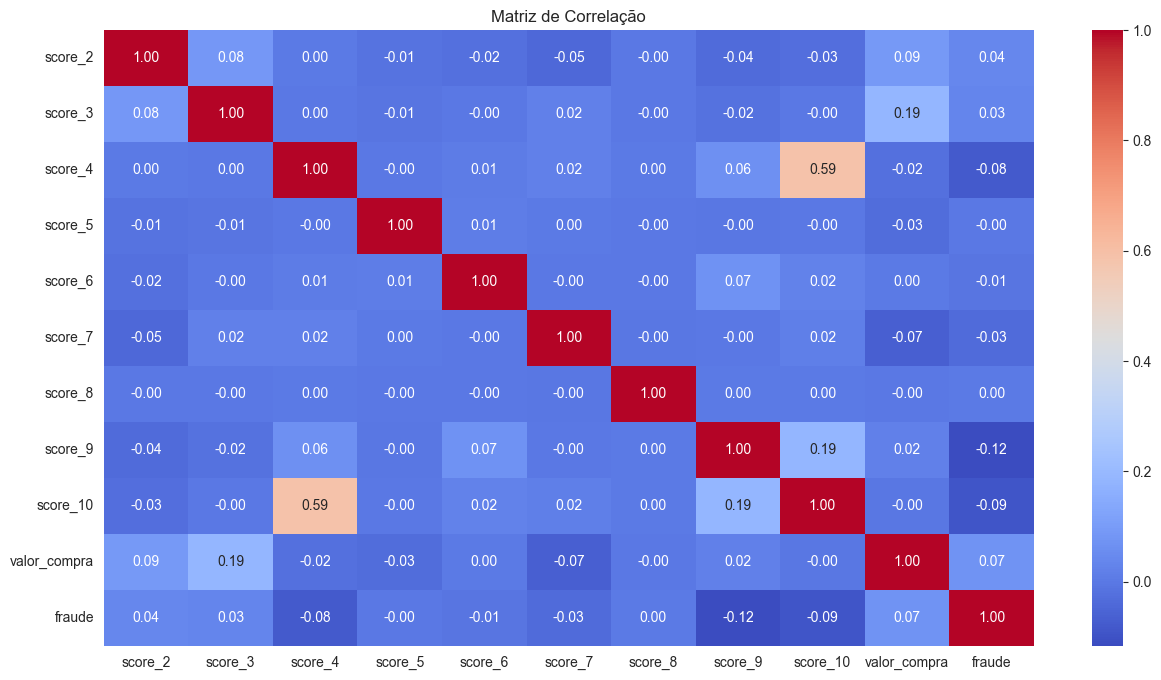

In [32]:
corr = df[['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'valor_compra', 'fraude']].corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de Correlação")
plt.show()

Possuímos uma correlação positiva de 0.59 entre `score_10` e `score_4`, que é moderada. Não irei remover uma feature, pois não é uma correlação forte.

Vejamos agora em relação ao valor da compra

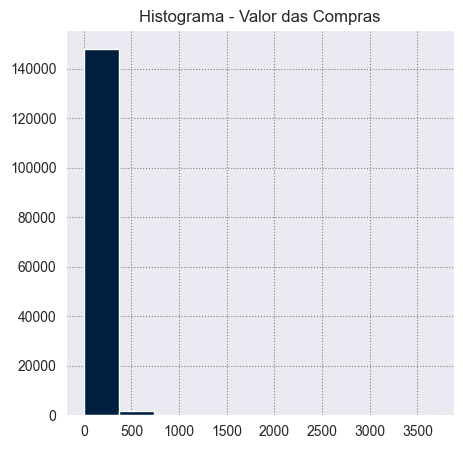

In [33]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.set_title("Histograma - Valor das Compras")
df.valor_compra.hist(ax = ax);

In [34]:
df.valor_compra.describe()

count    150000.000000
mean         43.523134
std          91.557888
min           0.020000
25%           9.380000
50%          20.610000
75%          40.692500
max        3696.350000
Name: valor_compra, dtype: float64

Temos uma amplitude alta entre os valores da compra, e alto desvio padrão, a maioria das transações foram feitas com um valor de compra menor. Para facilitar a visualização, irei setar um limite de 450 no eixo x.

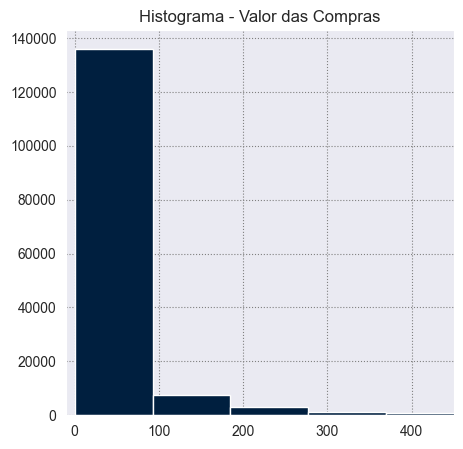

In [35]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.set_title("Histograma - Valor das Compras")
ax.set_xlim(-10, 450)
df.valor_compra.hist(ax = ax, bins = 40);

Agora veremos a variância das variáveis.

In [36]:
df.var()

score_1                5.673186e-01
score_2                1.767381e-02
score_3                7.164541e+11
score_4                4.024897e+02
score_5                5.929199e+00
score_6                5.033518e+05
score_7                2.005400e+02
score_8                8.314431e-02
score_9                2.932244e+06
score_10               1.030897e+05
entrega_doc_1          8.811238e-02
valor_compra           8.382847e+03
score_fraude_modelo    8.407171e+02
fraude                 4.750032e-02
dtype: float64

Algumas variáveis possuem a variância baixa, como o `score_8`.

### ANÁLISE EXPLORATÓRIA (EDA) BIVARIADA

Hipóteses:
1. Há alguma relação entre entrega dos documentos e fraude?
2. Há alguma relação entre score e fraude?
3. Há alguma relação entre país e fraude?
4. Há alguma relação entre fraude e tempo?


Primeiramente, irei plotar alguns gráficos de dispersão para algumas variáveis de interesse.

In [37]:
df_subset = df[['score_3','entrega_doc_1','score_9','score_6','valor_compra', 'fraude']].copy()

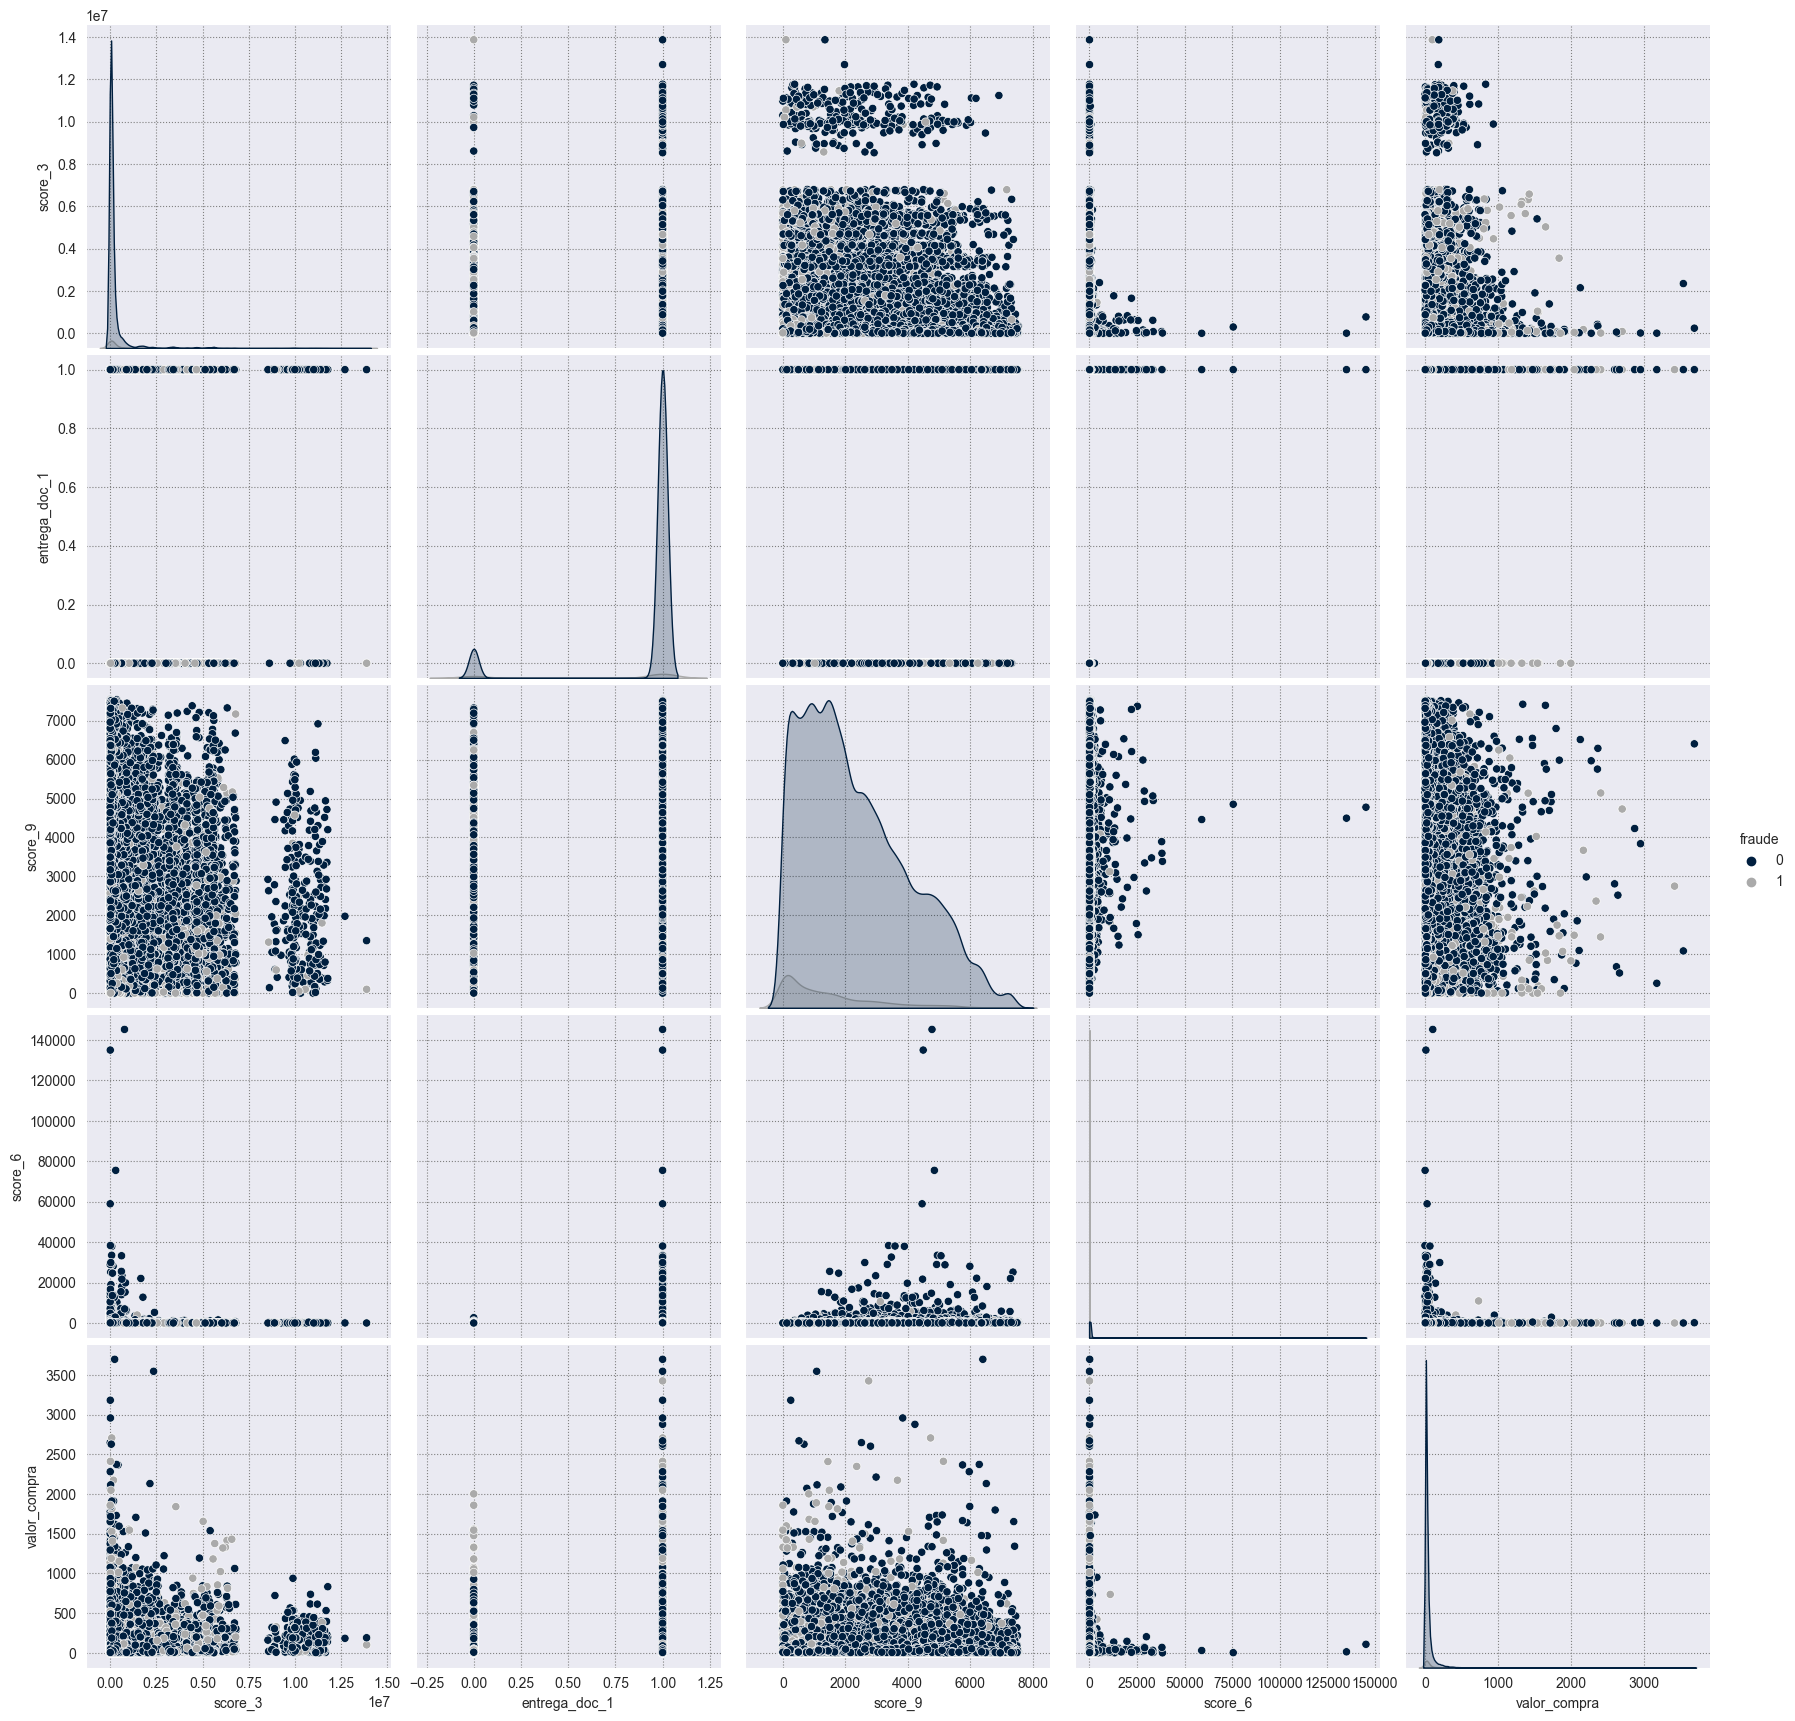

In [38]:
# matriz de gráficos scatter 
sns.pairplot(df_subset, hue='fraude', height=3.5)
    
# mostra o gráfico usando a função show() da matplotlib
plt.show()

Não é possível identificar pelos gráficos uma relação relevante.
Abaixo, irei realizar testes de hipóteses para a variável alvo `fraude` e demais variáveis.

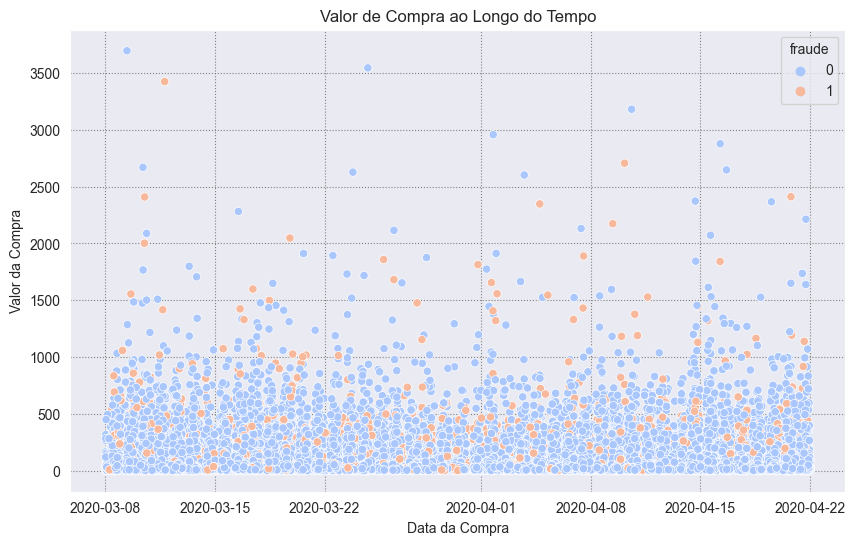

In [39]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando os dados
sns.scatterplot(x='data_compra', y='valor_compra', hue='fraude', data=df, palette="coolwarm")

# Configurando o título e os rótulos dos eixos
plt.title("Valor de Compra ao Longo do Tempo")
plt.xlabel("Data da Compra")
plt.ylabel("Valor da Compra")

# Mostra o gráfico
plt.show()


Não é possível notar uma relação linear de fraudes ao longo do tempo.

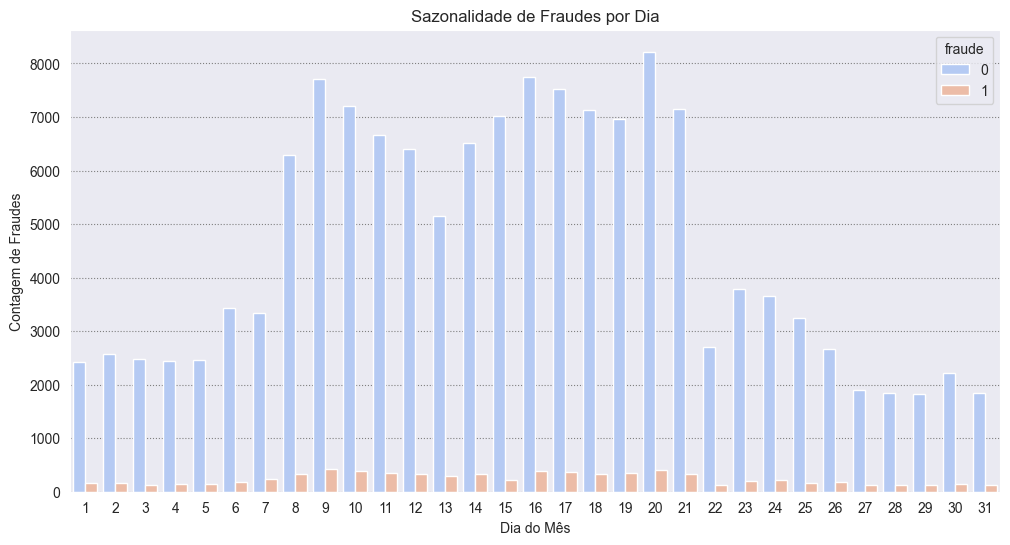

In [40]:
df_new = df.copy()

# Extrai o dia em uma coluna separada
df_new['dia'] = df_new['data_compra'].dt.day


# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando a contagem de fraudes por dia
sns.countplot(x='dia', hue='fraude', data=df_new, palette='coolwarm')

# Configurando o título e os rótulos dos eixos
plt.title("Sazonalidade de Fraudes por Dia")
plt.xlabel("Dia do Mês")
plt.ylabel("Contagem de Fraudes")

# Mostra o gráfico
plt.show()

In [41]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df_new["dia"], df_new["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, expected = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'dia' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'dia' e 'fraude' parecem ser independentes.")
    

Valor de chi2: 176.07910490044085
Valor p: 1.3308511585064855e-22
Rejeitamos a hipótese nula. Há uma relação significativa entre 'dia' e 'fraude'.


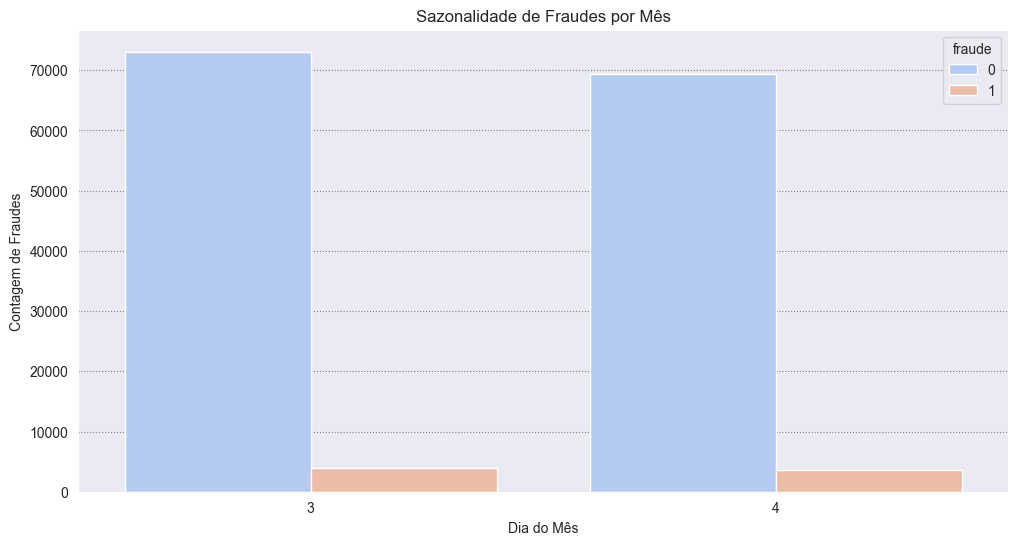

In [42]:
# Extrai o dia em uma coluna separada
df_new['mes'] = df_new['data_compra'].dt.month


# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando a contagem de fraudes por dia
sns.countplot(x='mes', hue='fraude', data=df_new, palette='coolwarm')

# Configurando o título e os rótulos dos eixos
plt.title("Sazonalidade de Fraudes por Mês")
plt.xlabel("Dia do Mês")
plt.ylabel("Contagem de Fraudes")

# Mostra o gráfico
plt.show()

In [43]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df_new["mes"], df_new["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, expected = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'mes' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'mes' e 'fraude' parecem ser independentes.")
    

Valor de chi2: 0.45471226672131904
Valor p: 0.5001056271366706
Não rejeitamos a hipótese nula. 'mes' e 'fraude' parecem ser independentes.


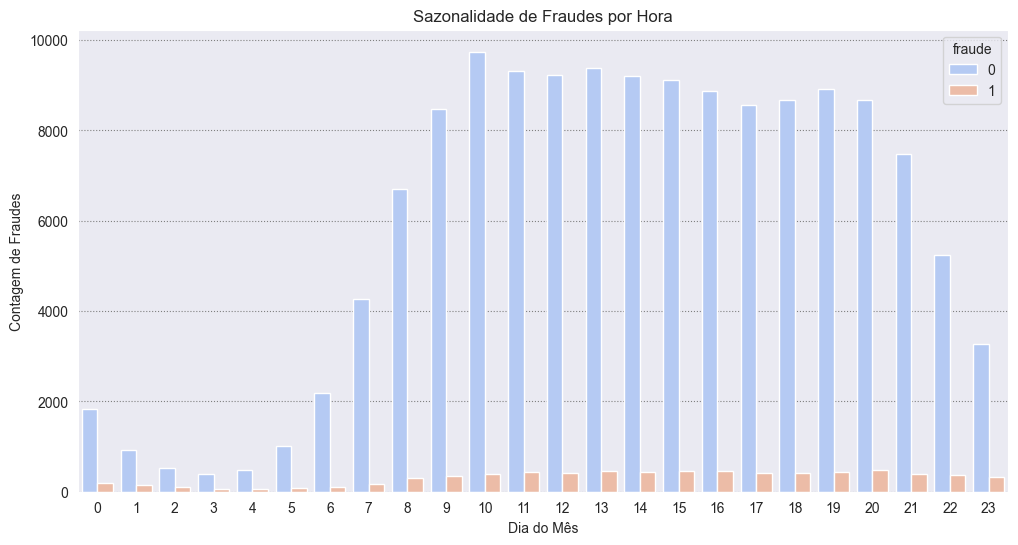

In [44]:
# Extrai o dia em uma coluna separada
df_new['hora'] = df_new['data_compra'].dt.hour

# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando a contagem de fraudes por dia
sns.countplot(x='hora', hue='fraude', data=df_new, palette='coolwarm')

# Configurando o título e os rótulos dos eixos
plt.title("Sazonalidade de Fraudes por Hora")
plt.xlabel("Dia do Mês")
plt.ylabel("Contagem de Fraudes")

# Mostra o gráfico
plt.show()

In [45]:
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência
contingency_table = pd.crosstab(df_new["hora"], df_new["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, expected = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'hora' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'hora' e 'fraude' parecem ser independentes.")
    

Valor de chi2: 841.6593861727897
Valor p: 5.3030288311866235e-163
Rejeitamos a hipótese nula. Há uma relação significativa entre 'hora' e 'fraude'.


Apesar de rejeitarmos a hipótese nula para dia e hora, por não fazermos um modelo tipo time series, não faz sentido colocá-la como feature. Essa coluna, entretanto, poderia ser usada para verificar a performance do modelo em relação ao tempo, uma vez que os fraudadores desenvolvem técnicas diferentes ao longo do tempo, além de poder haver shift de população - o que pode degradar nosso modelo com o tempo. Contudo, no subconjunto fornecido temos apenas 2 meses de dados e, por isso, não será possível verificar tais comportamentos em tão pouco tempo. Dessa forma, a coluna será removida do modelo.

Faremos abaixo testes de hipóteses para verificar se há uma relação significativa entre `score_1` e `fraude`, bem como as entregas dos documentos, o país e o valor da compra.

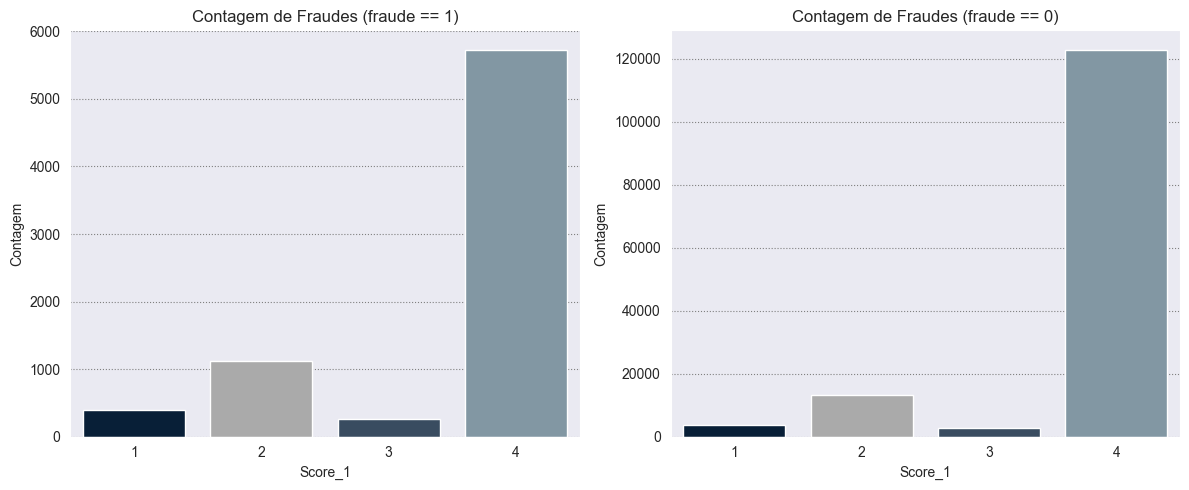

In [46]:
# Criar uma figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para fraude == 1
df_fraude_1 = df[df["fraude"] == 1]
sns.countplot(x="score_1", data=df_fraude_1, ax=axes[0])
axes[0].set_title("Contagem de Fraudes (fraude == 1)")
axes[0].set_xlabel("Score_1")
axes[0].set_ylabel("Contagem")

# Gráfico para fraude == 0
df_fraude_0 = df[df["fraude"] == 0]
sns.countplot(x="score_1", data=df_fraude_0, ax=axes[1])
axes[1].set_title("Contagem de Fraudes (fraude == 0)")
axes[1].set_xlabel("Score_1")
axes[1].set_ylabel("Contagem")

# Ajuste de espaço entre os gráficos
plt.tight_layout()
plt.show()

In [47]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df["score_1"], df["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, expected = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'score_1' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'score_1' e 'fraude' parecem ser independentes.")
    

Valor de chi2: 584.4465798546843
Valor p: 2.371872621590785e-126
Rejeitamos a hipótese nula. Há uma relação significativa entre 'score_1' e 'fraude'.


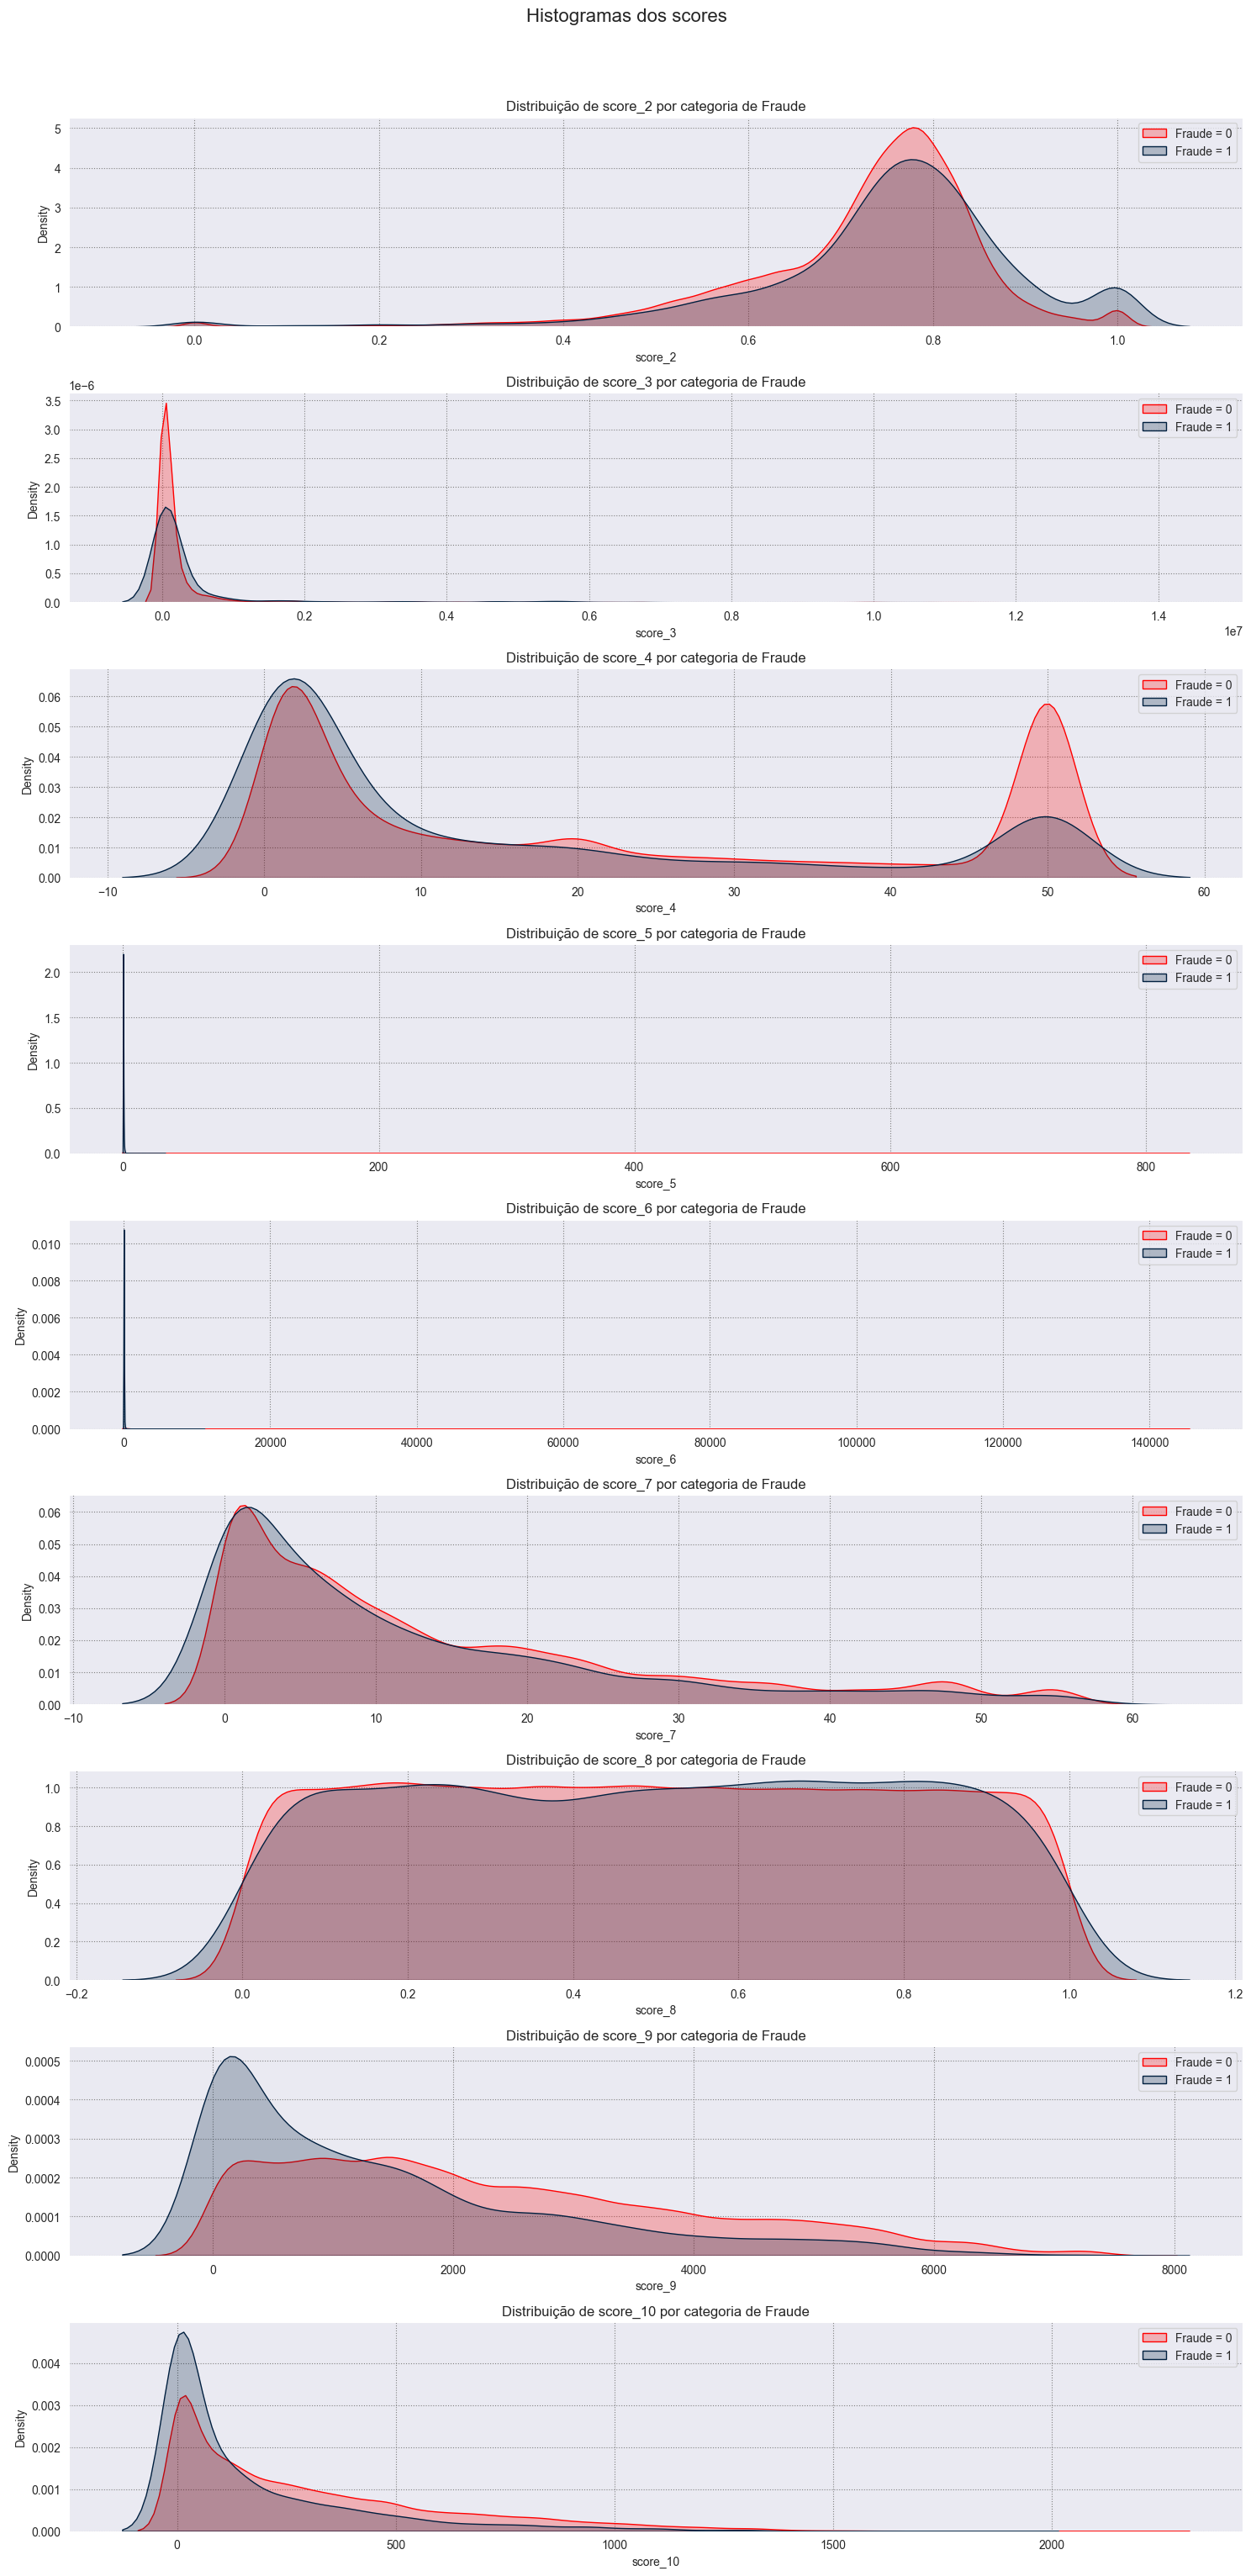

In [11]:
columns = ['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10']

# Configurações de layout
fig, axarr = plt.subplots(len(columns), 1, figsize=(15, 30))

for i, col in enumerate(columns):
    sns.kdeplot(df[df['fraude'] == 0][col], ax=axarr[i], shade=True, label='Fraude = 0', fill = True, color = 'r')
    sns.kdeplot(df[df['fraude'] == 1][col], ax=axarr[i], shade=True, label='Fraude = 1', fill = True)
    axarr[i].set_title(f"Distribuição de {col} por categoria de Fraude")
    axarr[i].legend()

# Adiciona um título geral para a figura
plt.suptitle("Histogramas dos scores", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

In [12]:
for item in columns:
    count_not_fraude = df[(df.fraude == 0) & (df[item].notnull())].index.nunique() #conta quantas compras não foram fraudulentas
    count_fraude = df[(df.fraude == 1) & (df[item].notnull())].index.nunique() #conta quantas compras foram fraudulentas
    
    not_fraude =  df [df.fraude == 0][item]                                         
    fraude = df[df.fraude == 1][item]
    
    t, pvalue = stats.ks_2samp(not_fraude, fraude)
    alpha = 0.05
    print(item)
    print(pvalue)
    if pvalue > alpha: 
        print('não rejeita hipotese nula - distribuições são iguais')
    else:
        print('rejeita hipotese nula - distribuições são diferentes')  

score_2
1.2554815277967686e-78
rejeita hipotese nula - distribuições são diferentes
score_3
1.2341789595630093e-27
rejeita hipotese nula - distribuições são diferentes
score_4
3.711719104373372e-170
rejeita hipotese nula - distribuições são diferentes
score_5
1.306772565773067e-44
rejeita hipotese nula - distribuições são diferentes
score_6
0.0
rejeita hipotese nula - distribuições são diferentes
score_7
5.651399372175321e-46
rejeita hipotese nula - distribuições são diferentes
score_8
0.2406798769129681
não rejeita hipotese nula - distribuições são iguais
score_9
0.0
rejeita hipotese nula - distribuições são diferentes
score_10
0.0
rejeita hipotese nula - distribuições são diferentes


A hipótese nula não foi rejeitada apenas para o `score_8`, onde de fato, não notamos diferenças nas distribuições. Vejamos agora em relação a entrega de documentos.

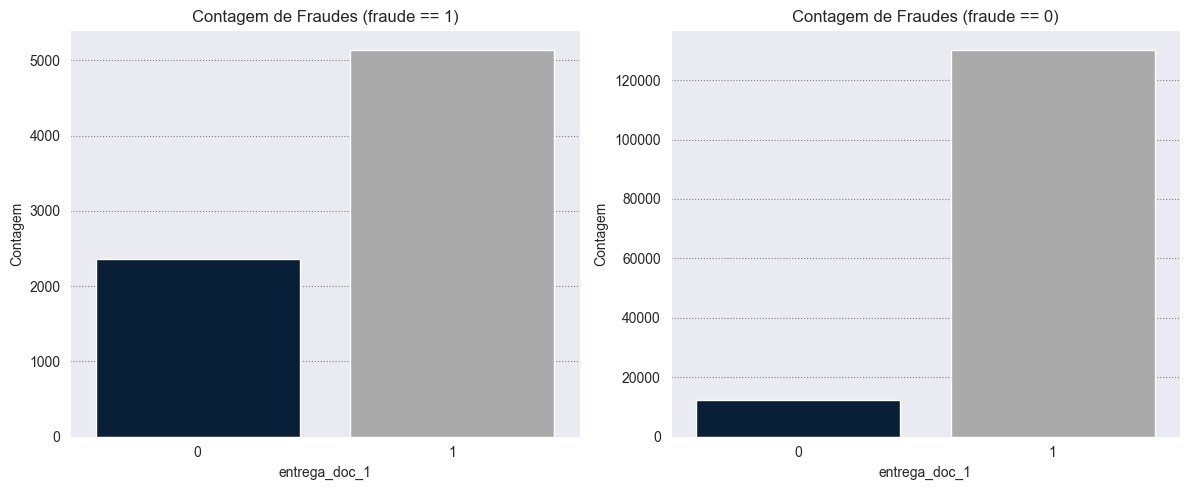

In [50]:
# Criar uma figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para fraude == 1
df_fraude_1 = df[df["fraude"] == 1]
sns.countplot(x="entrega_doc_1", data=df_fraude_1, ax=axes[0])
axes[0].set_title("Contagem de Fraudes (fraude == 1)")
axes[0].set_xlabel("entrega_doc_1")
axes[0].set_ylabel("Contagem")

# Gráfico para fraude == 0
df_fraude_0 = df[df["fraude"] == 0]
sns.countplot(x="entrega_doc_1", data=df_fraude_0, ax=axes[1])
axes[1].set_title("Contagem de Fraudes (fraude == 0)")
axes[1].set_xlabel("entrega_doc_1")
axes[1].set_ylabel("Contagem")

# Ajuste de espaço entre os gráficos
plt.tight_layout()
plt.show()

In [51]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df["entrega_doc_1"], df["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'entrega_doc_1' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'entrega_doc_1' e 'fraude' parecem ser independentes.")

Valor de chi2: 4217.317158934374
Valor p: 0.0
Rejeitamos a hipótese nula. Há uma relação significativa entre 'entrega_doc_1' e 'fraude'.


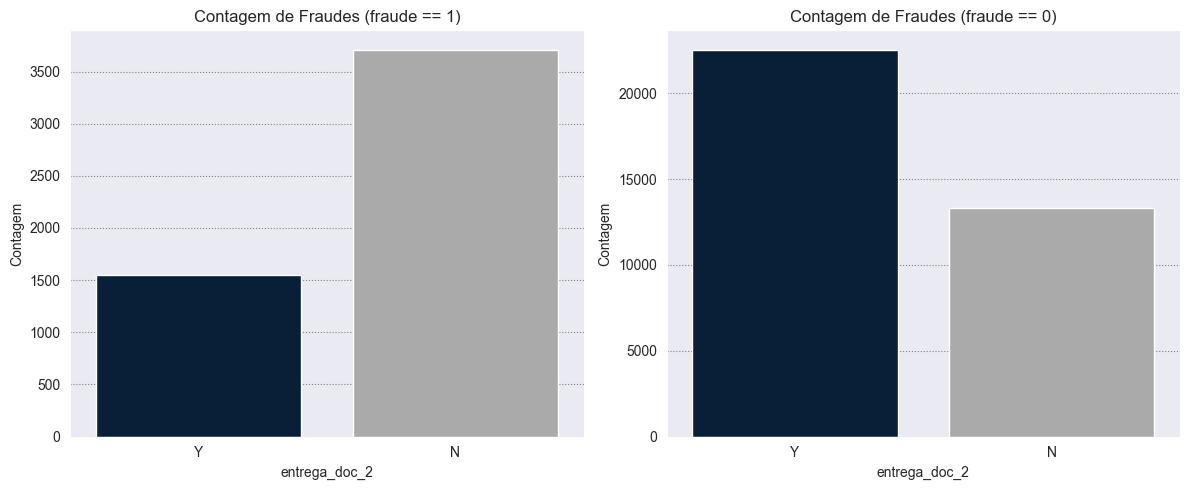

In [52]:
# Criar uma figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para fraude == 1
df_fraude_1 = df[df["fraude"] == 1]
sns.countplot(x="entrega_doc_2", data=df_fraude_1, ax=axes[0])
axes[0].set_title("Contagem de Fraudes (fraude == 1)")
axes[0].set_xlabel("entrega_doc_2")
axes[0].set_ylabel("Contagem")

# Gráfico para fraude == 0
df_fraude_0 = df[df["fraude"] == 0]
sns.countplot(x="entrega_doc_2", data=df_fraude_0, ax=axes[1])
axes[1].set_title("Contagem de Fraudes (fraude == 0)")
axes[1].set_xlabel("entrega_doc_2")
axes[1].set_ylabel("Contagem")

# Ajuste de espaço entre os gráficos
plt.tight_layout()
plt.show()

In [53]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df["entrega_doc_2"], df["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'entrega_doc_2' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'entrega_doc_2' e 'fraude' parecem ser independentes.")

Valor de chi2: 2093.9742824255336
Valor p: 0.0
Rejeitamos a hipótese nula. Há uma relação significativa entre 'entrega_doc_2' e 'fraude'.


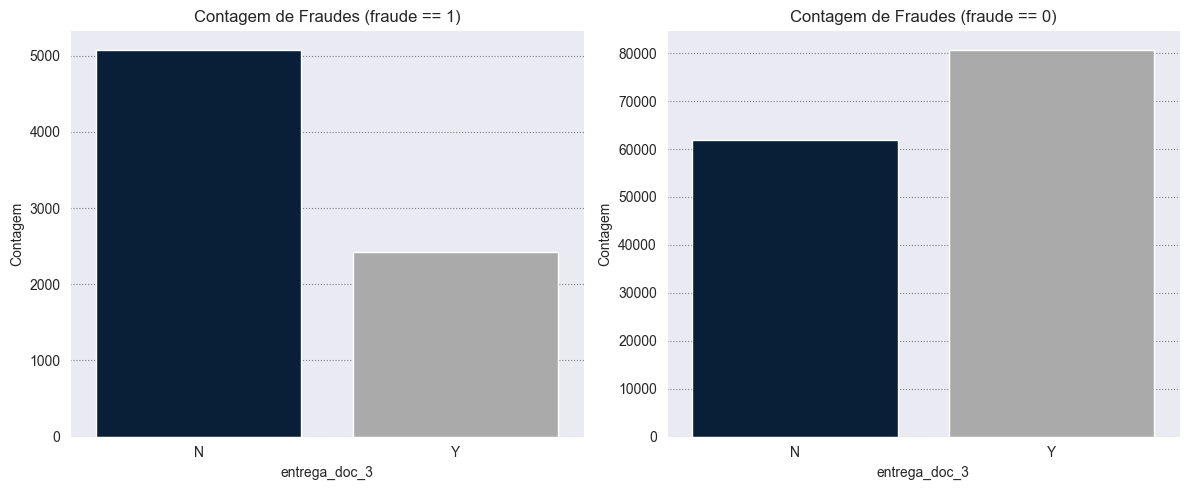

In [54]:
# Criar uma figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para fraude == 1
df_fraude_1 = df[df["fraude"] == 1]
sns.countplot(x="entrega_doc_3", data=df_fraude_1, ax=axes[0])
axes[0].set_title("Contagem de Fraudes (fraude == 1)")
axes[0].set_xlabel("entrega_doc_3")
axes[0].set_ylabel("Contagem")

# Gráfico para fraude == 0
df_fraude_0 = df[df["fraude"] == 0]
sns.countplot(x="entrega_doc_3", data=df_fraude_0, ax=axes[1])
axes[1].set_title("Contagem de Fraudes (fraude == 0)")
axes[1].set_xlabel("entrega_doc_3")
axes[1].set_ylabel("Contagem")

# Ajuste de espaço entre os gráficos
plt.tight_layout()
plt.show()

In [55]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df["entrega_doc_3"], df["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'entrega_doc_3' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'entrega_doc_3' e 'fraude' parecem ser independentes.")

Valor de chi2: 1709.9413003678396
Valor p: 0.0
Rejeitamos a hipótese nula. Há uma relação significativa entre 'entrega_doc_3' e 'fraude'.


Vejamos agora para país e fraude.

In [56]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df["pais"], df["fraude"])

# Realizar o teste do qui-quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Valor de chi2:", chi2)
print("Valor p:", p)

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre 'pais' e 'fraude'.")
else:
    print("Não rejeitamos a hipótese nula. 'pais' e 'fraude' parecem ser independentes.")

Valor de chi2: 435.0414968257157
Valor p: 7.757972296868586e-63
Rejeitamos a hipótese nula. Há uma relação significativa entre 'pais' e 'fraude'.


Por fim, valor da compra e fraude.

In [57]:
# Separar os valores com base na coluna fraude
group1 = df[df['fraude'] == 0]['valor_compra']
group2 = df[df['fraude'] == 1]['valor_compra']

# Realizar o teste
stat, p = mannwhitneyu(group1, group2)

print('Estatística:', stat)
print('Valor p:', p)

if p < 0.05:
    print("Há uma diferença estatisticamente significativa nas distribuições entre os grupos.")
else:
    print("Não há uma diferença estatisticamente significativa nas distribuições entre os grupos.")


Estatística: 463387165.0
Valor p: 5.049078387837292e-84
Há uma diferença estatisticamente significativa nas distribuições entre os grupos.


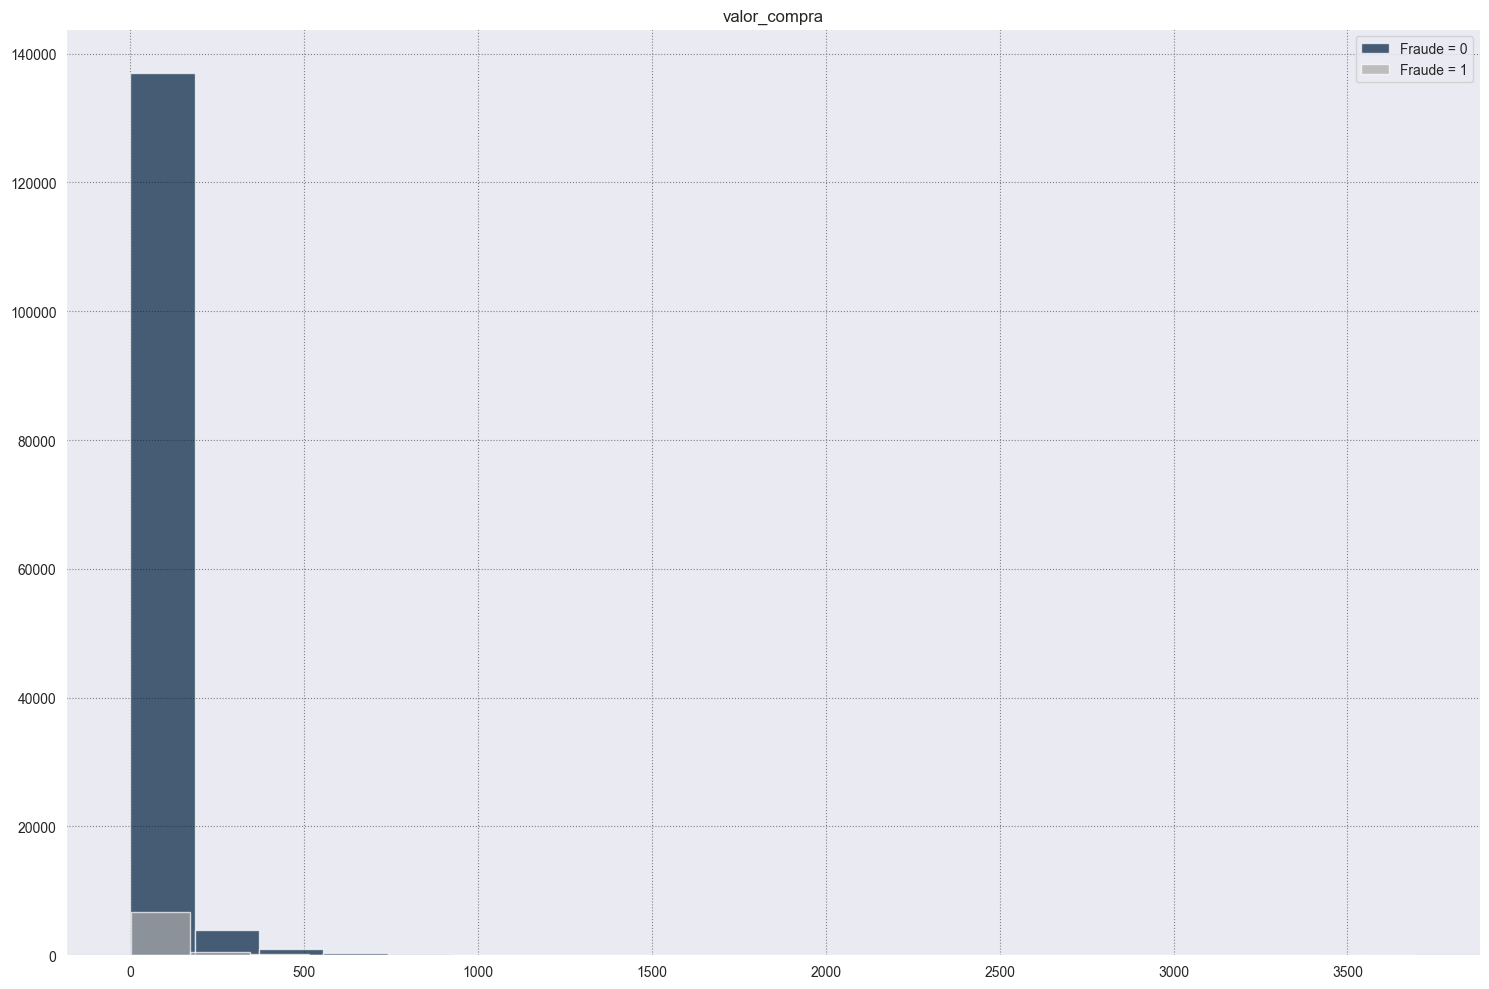

In [58]:
columns = ['valor_compra']

# Configurações de layout
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

df[df['fraude'] == 0][columns].hist(ax=ax, alpha=0.7, label='Fraude = 0', bins=20)
df[df['fraude'] == 1][columns].hist(ax=ax, alpha=0.7, label='Fraude = 1', bins=20)
ax.legend()


plt.tight_layout()
plt.show()


### Divisão do Conjunto de Dados
Antes de realizar o pré-processamento dos dados, irei separar o conjunto de teste que validará a eficácia do modelo. É importante que o mesmo seja capaz de generalizar para evitar problemas como o underfitting, que ocorre quando o modelo tem baixo desempenho tanto no treinamento quanto na validação, ou o overfitting, que ocorre quando o modelo se adapta demasiadamente ao treinamento e não consegue generalizar para novos dados. A separação antes da padronização ocorre para que os dados de teste não tenham contato com os de treino e validação, simulando uma situação real.

In [59]:
def split_df(df):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    return df_train, df_test

df_train, df_test = split_df(df)

X_train = df_train.drop('fraude', axis=1)
y_train = df_train.fraude

X_test = df_test.drop('fraude', axis=1)
y_test = df_test.fraude

### Modelo Baseline

Primeiramente, verificaremos a distribuição do modelo atual. É possível notar que o modelo está longe do ideal, pois há uma intersecção grande entre transações fraudulentas e reais na classificação. 

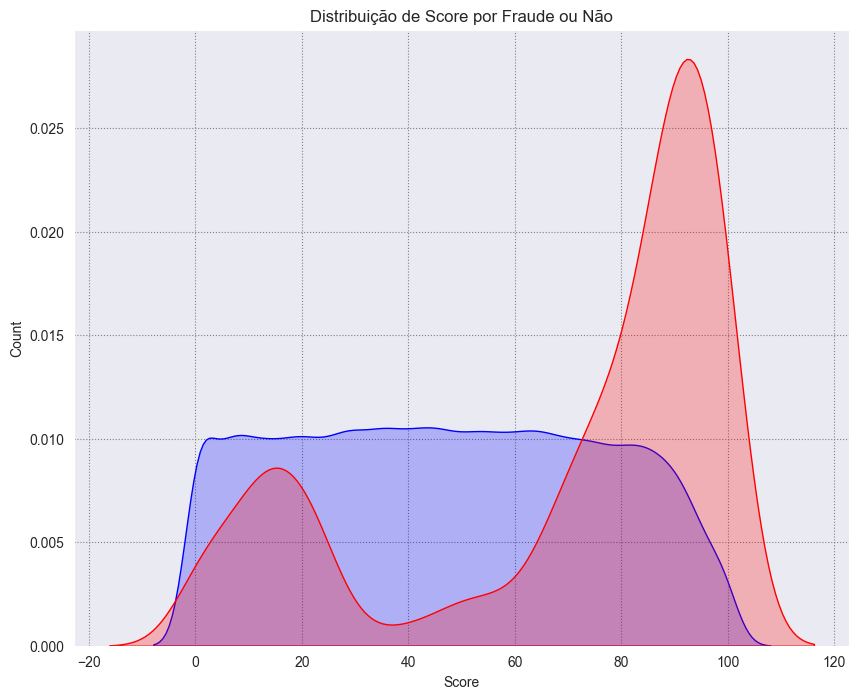

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(df.loc[lambda df: df.fraude == 0]['score_fraude_modelo'], ax=ax, color="b", fill = True)
sns.kdeplot(df.loc[lambda df: df.fraude == 1]['score_fraude_modelo'], ax=ax, color="r", fill = True)

plt.title("Distribuição de Score por Fraude ou Não")
plt.xlabel("Score")
plt.ylabel("Count");

Verificaremos agora outras métricas, como AUC, matriz de confusão e afins.

In [61]:
fpr, tpr, thresholds = roc_curve(df['fraude'], df['score_fraude_modelo'])
auc = auc(fpr, tpr)
print("ROC AUC: ", auc)

ROC AUC:  0.726275487251462


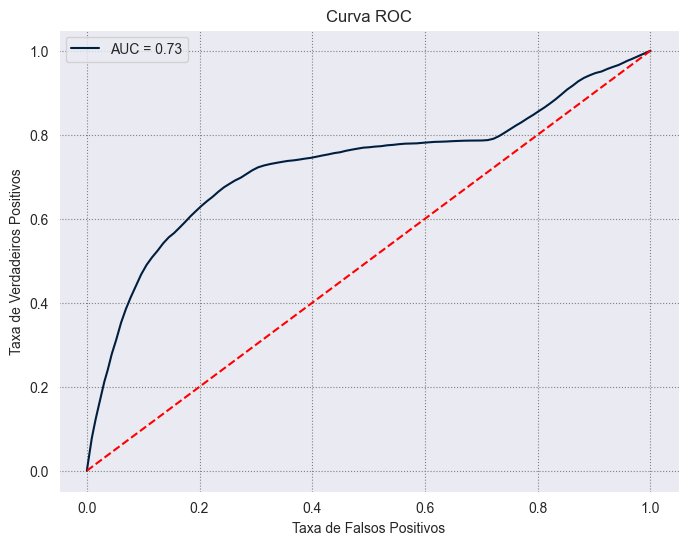

In [62]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

Por fim, iremos verificar qual o threshold que maximiza o lucro e plotar as demais métricas. Será assumido que o valor da compra está em uma única unidade de medida.

In [63]:
def profit_from_decision(decision_df, blocked_col, target_col, amount_col):
    """
    Calculates fraud losses, revenues, and profit based on the given decision dataframe.
    
    Parameters:
    - decision_df (pd.DataFrame): Dataframe containing decision data
    - blocked_col (str): Name of the column indicating if a transaction was blocked
    - target_col (str): Name of the column indicating if a transaction was a fraud
    - amount_col (str): Name of the column indicating the transaction amount
    
    Returns:
    pd.Series: Series containing summed values of fraud losses, revenues, and profit
    """
    
    # Fraud losses: when a transaction was not blocked but it was a fraud
    decision_df["fraud_losses"] = ((~decision_df[blocked_col]) & (decision_df[target_col])) * decision_df[amount_col]
    
    # Revenues: when a transaction was not blocked and it was not a fraud
    decision_df["revenues"] = ((~decision_df[blocked_col]) & (~decision_df[target_col])) * decision_df[amount_col] * 0.1
    
    # Profit: Revenues minus Fraud losses
    decision_df["profit"] = decision_df["revenues"] - decision_df["fraud_losses"]
    
    return decision_df[["fraud_losses", "revenues", "profit"]].sum()

In [64]:
target_col = "fraude"
prediction_col = "score_fraude_modelo"
amount_col = "valor_compra" 
blocked_col = "blocked"

possible_thresholds = np.arange(1, 100, 1)
all_decisions = []

for threshold in possible_thresholds: 
    all_decisions.append(profit_from_decision(df_test.assign(blocked=lambda df_test: df_test[prediction_col] >= threshold), blocked_col, 
                                              target_col, amount_col)
                         )
    

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()

threshold_evaluation

threshold  fraud_losses    revenues     profit
0           1       1181.23    3242.109   2060.879
1           2       1890.99    3917.883   2026.893
2           3       1969.12    4829.258   2860.138
3           4       2288.36    5726.876   3438.516
4           5       2692.96    6743.685   4050.725
..        ...           ...         ...        ...
94         95      84125.99  111680.516  27554.526
95         96      87603.24  112932.551  25329.311
96         97      90925.22  113735.367  22810.147
97         98      94238.31  114322.705  20084.395
98         99      97012.02  114967.326  17955.306

[99 rows x 4 columns]

In [65]:
best_threshold = threshold_evaluation.loc[threshold_evaluation["profit"].idxmax()]["threshold"]
best_decision_anterior = threshold_evaluation.loc[lambda df: df["profit"].idxmax()]
best_decision_anterior.reset_index().rename(columns = {72: 'valor $'})

index    valor $
0     threshold     73.000
1  fraud_losses  25353.320
2      revenues  80329.995
3        profit  54976.675

In [66]:
print(f"Razão de lucro: {54976.675/80329.995}")

Razão de lucro: 0.6843853905381172


Com o modelo atual, há uma perda de 25 mil por fraudes, um ganho de 80 mil, e por fim, um lucro de 54 mil. Contudo, é importante destacar que esses dados são amostrais e não refletem o todo.

In [67]:
df_test['predicted'] = df_test[prediction_col] >= best_threshold
cm = confusion_matrix(df_test[target_col], df_test['predicted'])

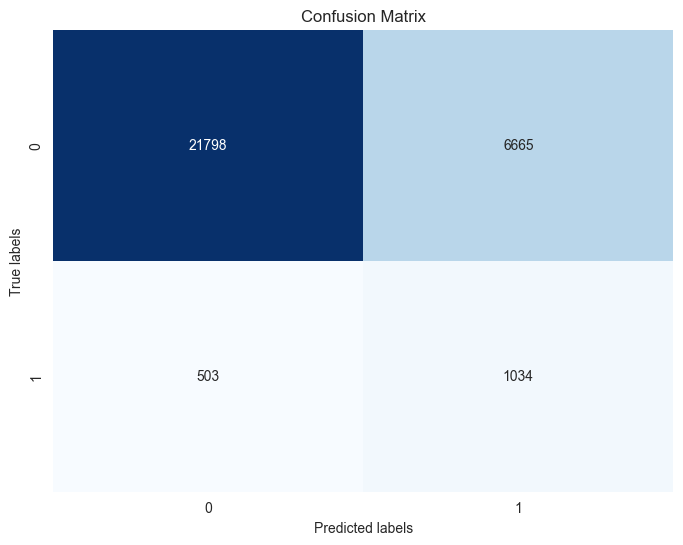

In [68]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(cm)

In [69]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]


fraud_rate = round(FN / (FN + TN), 2)
approval_rate = round((FN + TN) / (TN + FP + FN + TP), 2)

print(f"Taxa de fraude = {fraud_rate}")
print(f"Taxa de aprovação = {approval_rate}")

Taxa de fraude = 0.02
Taxa de aprovação = 0.74


Como visto acima, nossa **taxa de fraude** é de **2%** e a **taxa de aprovação** de **74%**!

Veremos agora mais métricas do modelo como log loss, AUC, e afins.

In [70]:
# Converte as probabilidades em classificações binárias com base em um limiar (0.5 é comum)
y_pred_binary = df_test[prediction_col] >= best_threshold

# Calcula as métricas de desempenho
loss = log_loss(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, df_test[prediction_col] >= best_threshold)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Imprime as métricas de desempenho
print(f'Log Loss: {loss:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Log Loss: 8.2526
ROC-AUC: 0.7193
Precisão: 0.13
Recall: 0.67
F1-score: 0.22


### Pré-processamento

#### Considerações
* A coluna `valor_compra` refere-se ao valor da compra e está em uma única unidade (ex: Dólar)
* Não há custo extra de fraude além do mencionado
* Nenhuma das colunas inseridas no modelo poderão causar data leakage - ou seja, todas esses dados são calculados/recebidos antes que o evento "Fraude" ocorra.

#### Para o pré-processamento, eu optei por:

* Excluir a coluna `score_fraude_modelo`, que é o modelo baseline e não deve ser utilizada.
* Excluir a coluna `data_compra`, a fim de não degradar o modelo com o tempo.
* Excluir a coluna `produto`, devido a alta cardinalidade (mais de 8 mil categorias).
* Manter as 1000 categorias em `categoria_produto` que correspondem a 80% das fraudes.
* Limitar o `país` entre BR, AR (que compõe mais de 90% de toda a distribuição) e outros.
* Preencher os valores nulos de score com a mediana, pois não seguem uma distribuição normal. 
* Criar uma feature `is_null` e indicando quais valores de `entrega_doc_2` são nulos. 
* Considerar os nulos de `entrega_doc_2` como 0, ou seja, não entregou.
* Fazer target encoder na variável `categoria_produto` devido a alta cardinalidade.
* Fazer one hot encoder nas demais variáveis categóricas.

In [91]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=['data_compra', 'produto', 'score_fraude_modelo', 'categoria_produto'], axis = 1)
    
class DataProcessor(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        # Cria a coluna 'is_missing' com 1 para valores ausentes e 0 para valores não ausentes
        X_copy['is_missing'] = X_copy['entrega_doc_2'].isnull().astype(int)
        
        # Preenche os valores nulos com 0
        X_copy['entrega_doc_2'] = X_copy['entrega_doc_2'].fillna('N')
        X_copy['entrega_doc_2'] = X_copy['entrega_doc_2'].apply(lambda x: 1 if x == 'Y' else 0)

        # Processamento de colunas específicas
        X_copy['pais'] = X_copy['pais'].apply(lambda x: x if x in ['BR', 'AR'] else 'Outros')
        X_copy['entrega_doc_3'] = X_copy['entrega_doc_3'].apply(lambda x: 1 if x == 'Y' else 0)
       
        return X_copy

class ScoreImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.imputers = {}
    
    def fit(self, X, y = None):
        cols = ['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10']
        for col in cols:
            imputer = SimpleImputer(strategy = "median")
            imputer.fit(X[[col]])
            self.imputers[col] = imputer
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col, imputer in self.imputers.items():
            X_copy[col] = imputer.transform(X_copy[[col]])
        return X_copy
    
    
class OneHotFeatureEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.encoder = OneHotEncoder(sparse=False)  # Configurar sparse para False para retornar array denso
        self.cols = ['score_1', 'pais', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3', 'is_missing']
    
    def fit(self, X, y=None):
        self.encoder.fit(X[self.cols])
        return self
    
    def transform(self, X):
        onehot_data = self.encoder.transform(X[self.cols])
        
        # Convertendo o array onehot_data em um DataFrame
        onehot_df = pd.DataFrame(onehot_data, columns=self.encoder.get_feature_names_out(self.cols))
        
        # Para garantir que os índices estejam alinhados, vamos redefinir o índice do onehot_df para corresponder ao de X
        onehot_df.index = X.index
        
        X = X.drop(self.cols, axis=1)
        X = pd.concat([X, onehot_df], axis=1)
        
        return X
    
class KFoldTargetEncoder(BaseEstimator, TransformerMixin):

    def __init__(self):

        self.colnames = 'categoria_produto'
        self.targetName = 'fraude'
        self.n_fold = 5
        self.verbosity = True
        self.discardOriginal_col = False

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = True, random_state=42)


        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            

        return X

def pipeline(model):
    
    # Criando o pipeline
    pipe = Pipeline([
        ("dropper", ColumnDropper()),
        ("processor", DataProcessor()),
        ("imputer", ScoreImputer()),
        ("onehot", OneHotFeatureEncoder()),
        ('classifier', model)
    ])
    
    return pipe

In [92]:
df_copy = df.copy()

# Mantém 1000 categorias com 80% das fraudes
produtos_categorias = df_item_fraude[1000:]
lista_categorias_outros = produtos_categorias.categoria_produto.to_list()
df_copy.loc[df_copy["categoria_produto"].isin(lista_categorias_outros), "categoria_produto"] = "Outros"

df_train, df_test = split_df(df_copy)
        
#criando encoder usando Target Encoder para o grupo_categorias devido a alta cardinalidade
targetc = KFoldTargetEncoder()
df_train = targetc.fit_transform(df_train)
df_test = targetc.transform(df_test)

X_train = df_train.drop('fraude', axis=1)
y_train = df_train.fraude

X_test = df_test.drop('fraude', axis=1)
y_test = df_test.fraude

### Treinamento dos Algoritmos de Machine Learning

#### Maximizando o roc_auc

Balanced RF: 0.842834 (0.004967)
Light GBM: 0.846893 (0.005791)
XGBoost: 0.826281 (0.006537)
Decision Tree: 0.590646 (0.004514)


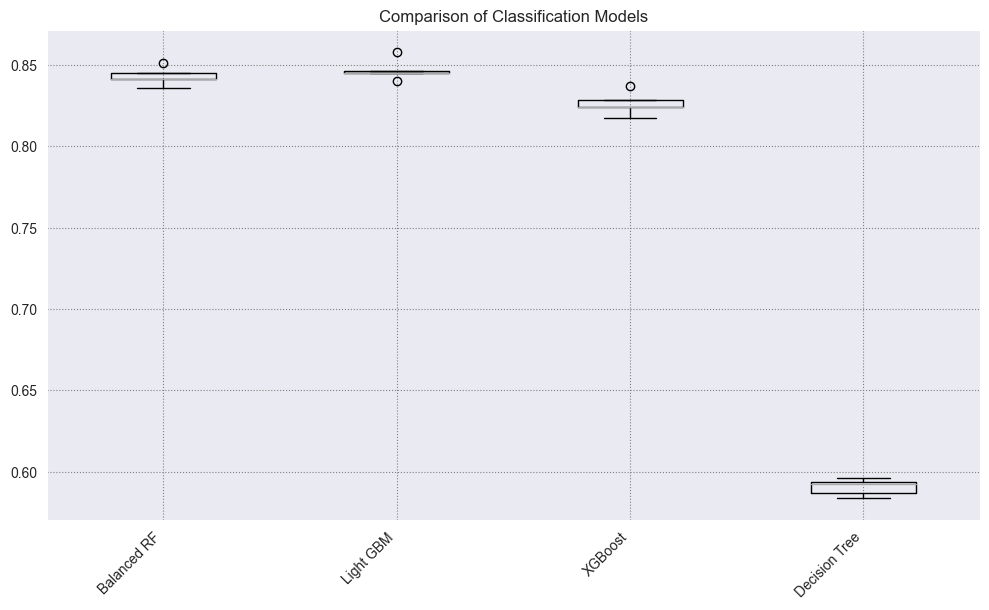

In [73]:
BRC = BalancedRandomForestClassifier(random_state=1234)
XGB = XGBClassifier(scale_pos_weight=19, random_state=1234)
LGB = LGBMClassifier(class_weight='balanced', random_state=1234)
DTC = DecisionTreeClassifier(class_weight='balanced', random_state=1234)

models = [BRC, LGB, XGB, DTC]

# Use shorter, more descriptive names for the models for better readability
model_names = ["Balanced RF", "Light GBM", "XGBoost", "Decision Tree"]

results = []

# Train models
for item in models:
    pipe = pipeline(item)
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (model_names[models.index(item)], cv_results.mean(), cv_results.std())
    print(msg)

# Plot comparison of models
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size for better clarity
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Rotate and adjust fontsize of x-labels
plt.tight_layout()  # Adjust layout
plt.title('Comparison of Classification Models')
plt.show()

Dos modelos testados, o `Decision Tree` foi o que obteve o pior desempenho. O `Balanced RF` e o `Light GBM` foram os que obtiveramm os melhores resultados, e o `XGBoost` obteve desempenho semelhante.
Optei por seguir com o `Light GBM` devido a sua consistência e processamento rápido.

### Ajuste dos hiperparâmetros

Irei utilizar o Randomized Search CV para realizar o ajuste dos hiperparâmetros. O RandomizedSearchCV é uma abordagem para a otimização de hiperparâmetros que é diferente do tradicional método de busca em grid (GridSearchCV). Em vez de procurar por todas as combinações possíveis de hiperparâmetros (como o GridSearchCV faz), o RandomizedSearchCV seleciona um número fixo de combinações de hiperparâmetros aleatoriamente de um espaço de possibilidades. 

In [74]:
mlflow.end_run()

In [93]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment(experiment_name="Pipeline - Teste")
mlflow.start_run(run_name="Sem log - Light GBM")

LGB = LGBMClassifier(class_weight='balanced', random_state=1234)
pipe = pipeline(LGB)


parameters = {
    'classifier__num_leaves': [31, 50, 100, 150],
    'classifier__max_depth': [10, 20, 30, 40, -1],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [80, 100, 150, 200],
    'classifier__min_child_samples': [5, 10, 20, 50],
    'classifier__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 1e-1, 1, 2],
    'classifier__reg_lambda': [0, 1e-1, 1, 5],
    'classifier__boosting_type': ['gbdt', 'dart', 'goss']
}



random_search = RandomizedSearchCV(pipe, parameters, cv=4, n_jobs=4, scoring="roc_auc")
random_search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % random_search.best_score_)
print(random_search.best_params_)
mlflow.log_metric("training_roc_auc", random_search.best_score_)


Best parameter (CV score=0.850):
{'classifier__subsample': 0.9, 'classifier__reg_lambda': 5, 'classifier__reg_alpha': 0, 'classifier__num_leaves': 50, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 1, 'classifier__min_child_samples': 10, 'classifier__max_depth': 30, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 1.0, 'classifier__boosting_type': 'goss'}


### Avaliação do Modelo Utilizando os Dados de Teste
No começo do projeto, realizamos um split nos dados para que tivéssemos 2 conjuntos: Um de treino e um de teste. Agora que já exploramos, preparamos os dados e treinamos o modelo, é hora de descobrirmos o potencial do modelo com os dados de teste.

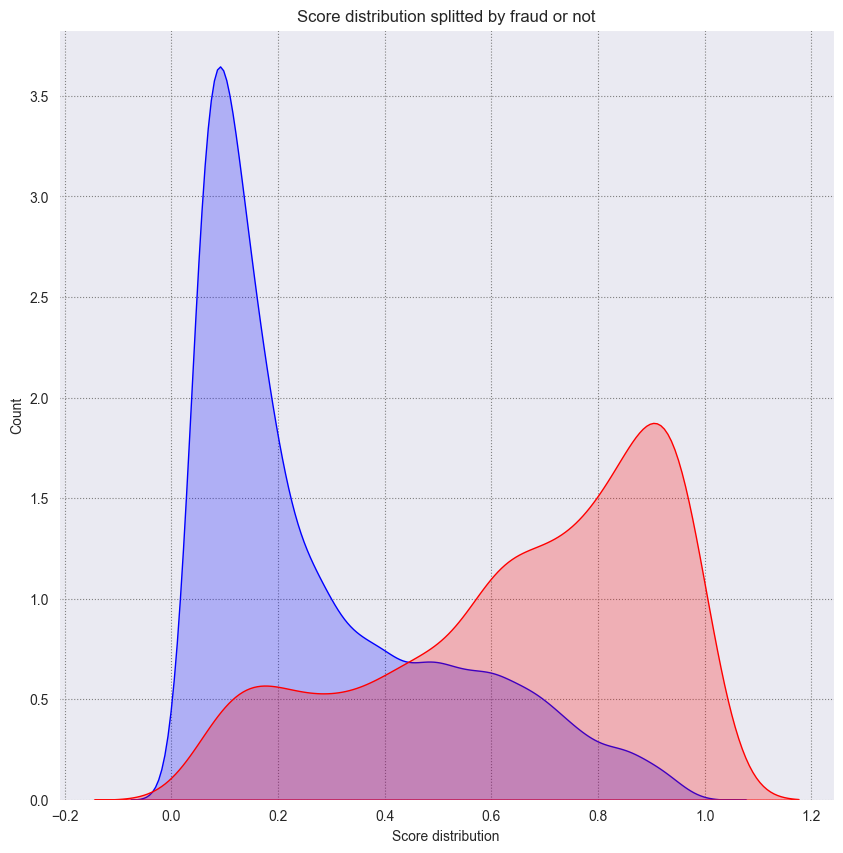

In [94]:
model = random_search.best_estimator_

y_test_pred = model.predict(X_test)
probs_test = model.predict_proba(X_test)

dataframe = df_test.copy()
dataframe['target_col'] = dataframe['fraude'] 
dataframe['prediction_col'] = probs_test[:,1]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.kdeplot(data=dataframe[dataframe['target_col'] == 0], x='prediction_col', ax=ax, color="b", fill=True)
sns.kdeplot(data=dataframe[dataframe['target_col'] == 1], x='prediction_col', ax=ax, color="r", fill=True)

plt.title("Score distribution splitted by fraud or not")
plt.xlabel("Score distribution")
plt.ylabel("Count")
plt.show()

Podemos perceber uma melhora considerável na classificação do modelo, embora ainda haja uma intersecção entre fraude e não fraude. Vejamos agora as métricas de business.

In [95]:
df_test['new_prediction_col'] = probs_test[:,1]*100
target_col = "fraude"
prediction_col = "new_prediction_col"
amount_col = "valor_compra" 
blocked_col = "blocked"

possible_thresholds = np.arange(1, 100, 1)
all_decisions = [profit_from_decision(df_test.assign(blocked=lambda x: x[prediction_col] >= threshold), blocked_col, target_col, amount_col) for threshold in possible_thresholds]

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=possible_thresholds).T.rename_axis("threshold").reset_index()

best_threshold = threshold_evaluation.loc[threshold_evaluation["profit"].idxmax()]["threshold"]
best_profit = threshold_evaluation["profit"].max()

threshold_evaluation

threshold  fraud_losses    revenues     profit
0           1          0.00       0.000      0.000
1           2          0.00      60.277     60.277
2           3          0.00     573.020    573.020
3           4         41.44    1983.118   1941.678
4           5         65.38    4436.357   4370.977
..        ...           ...         ...        ...
94         95      91023.91  116521.512  25497.602
95         96      98966.77  116695.068  17728.298
96         97     104929.74  116773.906  11844.166
97         98     107339.76  116855.229   9515.469
98         99     108164.71  116858.097   8693.387

[99 rows x 4 columns]

In [103]:
best_decision_atual = threshold_evaluation.loc[lambda df: df["profit"].idxmax()]
best_decision_atual.reset_index().rename(columns = {60: 'valor $'})

index    valor $
0     threshold     61.000
1  fraud_losses  27007.200
2      revenues  95198.968
3        profit  68191.768

In [97]:
razao_lucro_novo = round(best_decision_atual.iloc[3]/best_decision_atual.iloc[2],2)
print(f"Razão de lucro: {razao_lucro_novo}")

Razão de lucro: 0.72


Para o modelo treinado, o threshold que maximiza o lucro é 61. Com esse modelo temos um lucro de 68 mil.

Ademais, nossa razão de lucro é 0.72. Vejamos abaixo a matriz de confusão.

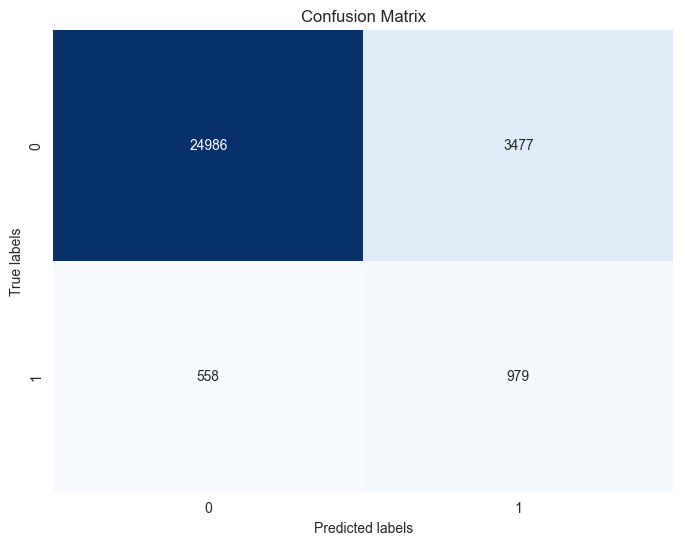

In [98]:
df_test['predicted'] = df_test[prediction_col] >= best_threshold
cm = confusion_matrix(df_test[target_col], df_test['predicted'])
plot_confusion_matrix(cm)

In [99]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]


fraud_rate = round(FN / (FN + TN), 2)
approval_rate = round((FN + TN) / (TN + FP + FN + TP), 2)

print(f"Taxa de fraude = {fraud_rate}")
print(f"Taxa de aprovação = {approval_rate}")

Taxa de fraude = 0.02
Taxa de aprovação = 0.85


A taxa de fraude se mantém em 0.02 com o modelo treinado, e aumentamos a taxa de aprovação para 85%.

ROC AUC:  0.85


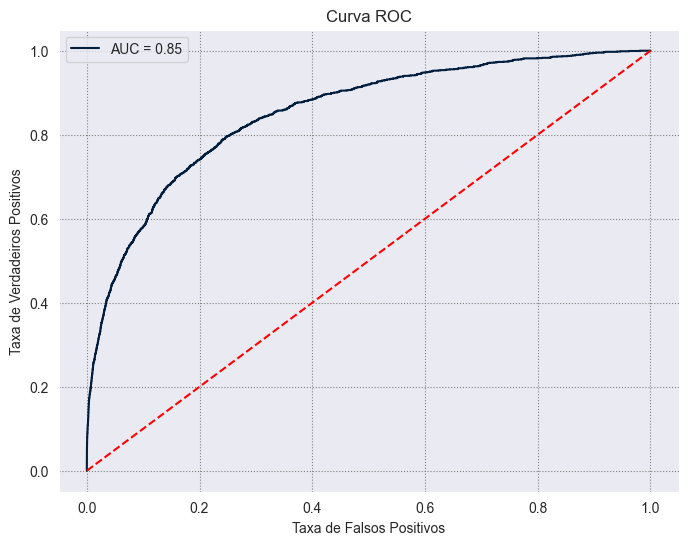

In [100]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df_test['fraude'], df_test['new_prediction_col'])
auc = auc(fpr, tpr)
print("ROC AUC: ", auc.round(2))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [101]:
# Converte as probabilidades em classificações binárias com base em um limiar (0.5 é comum)
y_pred_binary = df_test[prediction_col] >= best_threshold

# Calcula as métricas de desempenho
loss = log_loss(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Imprime as métricas de desempenho
print(f'Log Loss: {loss:.4f}')
print(f'ROC-AUC: {auc:.4f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Log Loss: 4.6456
ROC-AUC: 0.8512
Precisão: 0.22
Recall: 0.64
F1-score: 0.33


O auc para o modelo novo é 0.85. Ademais, abaixamos a log loss e aumentamos demais métricas como precisão e f1-score.

In [102]:
mlflow.log_metrics({
    "best_profit": best_profit,
    "best_threshold": best_threshold,
    "Log Loss": loss,
    "ROC-AUC": auc,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "Taxa de fraude": fraud_rate,
    "Taxa de aprovação": approval_rate,
    "Razão de lucro": razao_lucro_novo
})

mlflow.end_run()

### SHAP

SHAP é o pacote Python mais poderoso para compreender e depurar seus modelos. Pode nos dizer como cada feature do modelo contribuiu para uma previsão individual. Ao agregar valores SHAP, também podemos compreender tendências em múltiplas previsões.

In [113]:
import shap
shap.initjs()

In [118]:
preprocessing_pipeline = Pipeline(model.steps[:-1])
# Transformando X_test
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Get the actual model from the last step of the pipeline
actual_model = model.steps[-1][1]

# Initialize the SHAP explainer with the extracted model
explainer = shap.Explainer(actual_model)

# Compute SHAP values
shap_values = explainer(X_test_transformed)


In [166]:
np.shape(shap_values.values)

(30000, 26, 2)

Nosso modelo possui 26 features para cada uma das 30 mil instâncias, e temos duas classes alvos, sendo 0 não fraude e 1 fraude.
Podemos utilizar o gráfico `waterfall` para visualizar como foi a tomada de decisão do modelo. Abaixo, plotaremos a primeira instância da classe 0.

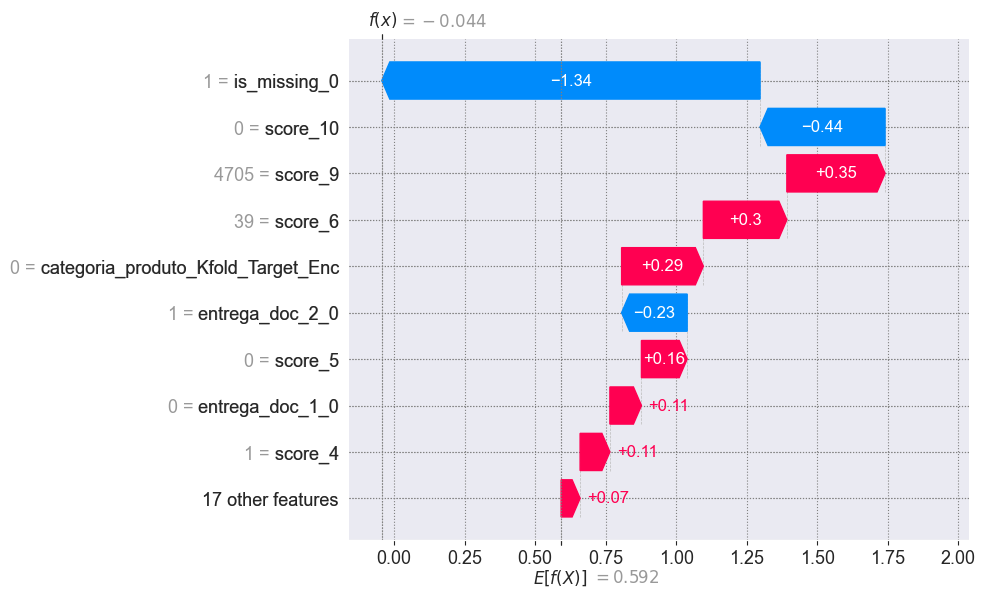

In [165]:
shap.plots.waterfall(shap_values[0, :, 0])

Para previsões categóricas, interpretamos os resultados em termos de log odds.

No gráfico acima, E(f(X)) representa a previsão média de log odd. A probabilidade dada para essa instância seria:

ln(P/1-P) = -0.044 -> P = 0.489

Valores de SHAP positivos aumentam o log odds. Por exemplo, o score_9 aumenta o log loss em 0.35

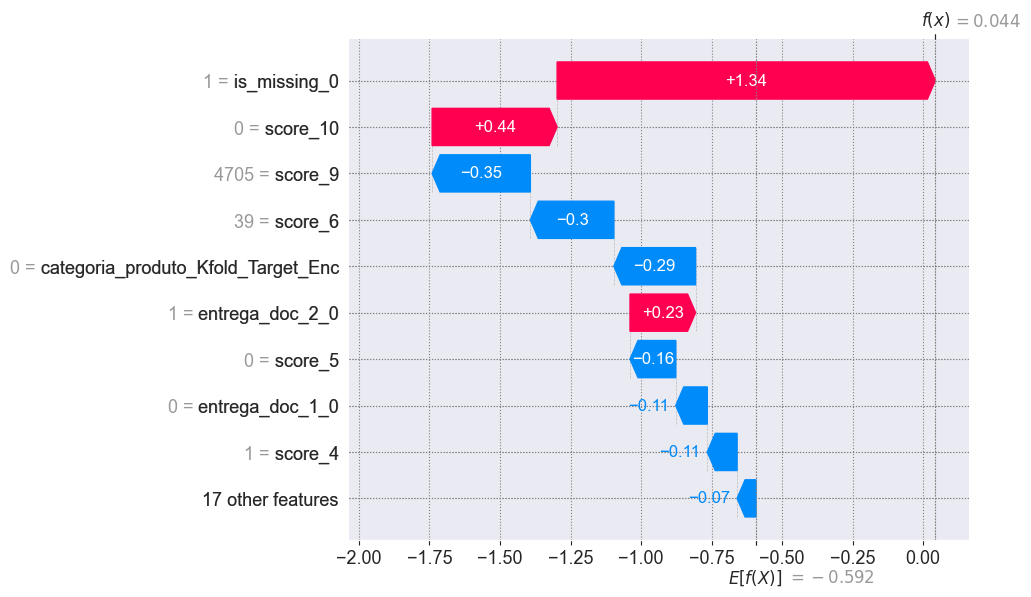

In [172]:
shap.plots.waterfall(shap_values[0, :, 1])

Para entender os valores em termos de probabilidade utilizaremos a função abaixo.

In [187]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x/e_x.sum(axis = 0)

# converte o softmax para probabilidade
x = [-0.044, 0.044]
softmax(x)

array([0.47801419, 0.52198581])

In [186]:
df_test.iloc[0]['predicted']

False

Podemos observar que para essa primeira instância, a probabilidade de pertencer à classe Fraude é de 0.52%, como nosso threshold que maximiza o lucro é maior, não a classificamos como fraude.

Podemos também entender quais features são mais importantes para a previsão utilizando a média absoluta do valor SHAP.

In [181]:
preds = actual_model.predict(X_test_transformed)

new_shap_values = []
for i, pred in enumerate(preds):
    new_shap_values.append(shap_values.values[i][:, pred])

shap_values.values = np.array(new_shap_values)
print(shap_values.shape)

(30000, 26)


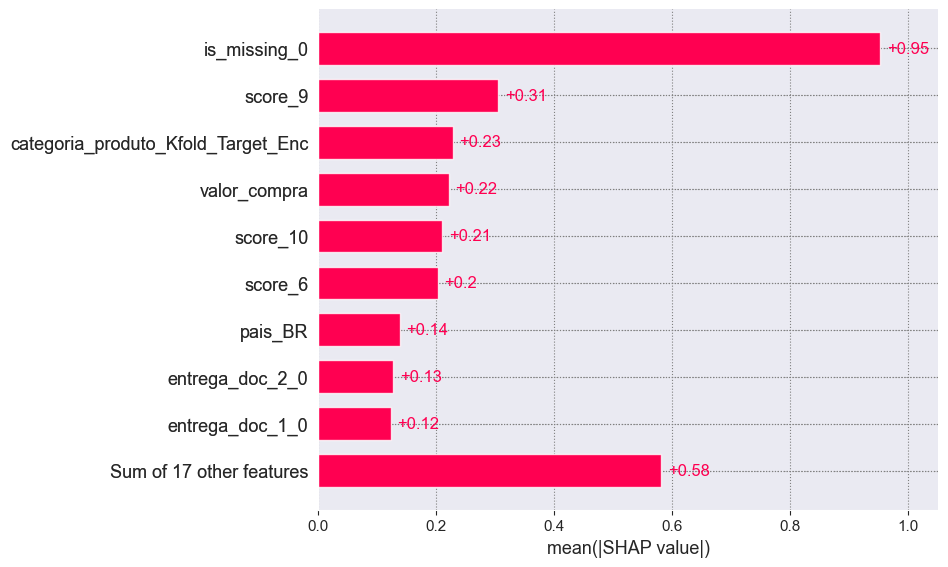

In [182]:
shap.plots.bar(shap_values)

As features mais relevantes foram quando o `is_missing` é 0, ou seja, a pessoa entregou o `entrega_doc_2`, o `score_9`, a `categoria_produto` e o valor da compra.

Também podemos capturar o relacionamento entre as features e a predição do modelo com o plot abaixo.

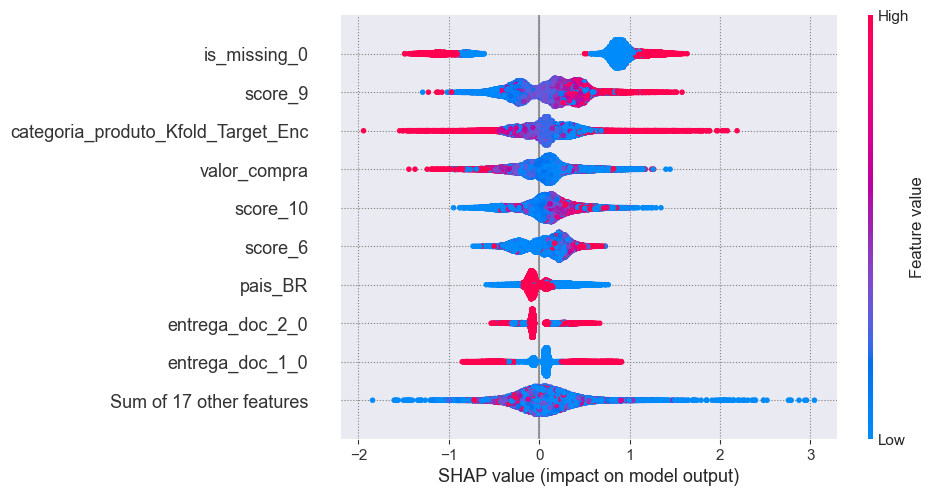

In [183]:
shap.plots.beeswarm(shap_values)

# Análise da Diferença em Lucro entre o Modelo Atual e o Modelo Treinado

## Modelo Atual:

| Metrica       | Valor       |
| ------------- | ----------- |
| threshold     | 73.000      |
| fraud_losses  | 25353.320   |
| revenues      | 80329.995   |
| profit        | 54976.675   |

- **Taxa de fraude:** 0.02
- **Taxa de aprovação:** 0.74

**Razão Lucro/Receitas (profit/revenues):** 0.68 (ou 68%)

## Modelo Treinado:

| Metrica       | Valor       |
| ------------- | ----------- |
| threshold     | 61.000      |
| fraud_losses  | 27007.200  |
| revenues      | 95198.968   |
| profit        | 68191.768   |


- **Taxa de fraude:** 0.02
- **Taxa de aprovação:** 0.85

**Razão Lucro/Receitas (profit/revenues):** 0.72 (ou 72%)


## Valuation dos Modelos Financeiros

Dado o crescimento em pagamentos e a aplicação de modelos preditivos para otimização de lucros, realizamos uma simulação para avaliar o impacto financeiro de transicionar do nosso Modelo Atual para um Modelo Treinado.

## Dados:

- **Volume total de pagamentos em um trimestre:** 20 M (milhões)
- **Valor médio de transação:** $ 43.5

## Cálculos:

### Receita Mensal

Primeiro, vamos calcular a receita média mensal para esse volume de pagamentos:




In [112]:
volume_total_pagamentos = 20  # em milhões
valor_medio_transacao = (df.valor_compra.mean())  # em dolares

print(f"Valor médio: {valor_medio_transacao}")

receita_mensal = (volume_total_pagamentos * valor_medio_transacao) / 3  # divide por 3 meses em um trimestre

print(f"Receita mensal: {receita_mensal}")

Valor médio: 43.523134133333336
Receita mensal: 290.15422755555556


### Lucro Mensal do Modelo Atual

Com base na razão lucro/receitas do modelo atual:

In [109]:
razao_lucro_receitas_atual = 0.68  # ou 68%

lucro_mensal_atual = razao_lucro_receitas_atual * receita_mensal
lucro_mensal_atual

197.3048747377778


### Lucro Mensal do Modelo Treinado

Para o Modelo Treinado:



In [110]:
razao_lucro_receitas_treinado = 0.72 # ou 72%

lucro_mensal_treinado = razao_lucro_receitas_treinado * receita_mensal
lucro_mensal_treinado

208.91104384

## Conclusão:

A diferença entre o lucro do Modelo Atual e o Modelo Treinado representa o ganho potencial ao implementarmos o novo modelo:



In [111]:
ganho_potencial = lucro_mensal_treinado - lucro_mensal_atual
ganho_potencial

11.606169102222196


Assim, observamos que a implementação do Modelo Treinado pode trazer um incremento significativo no lucro mensal em comparação com o modelo atual.


## Conclusão Geral:

Após uma análise aprofundada das métricas de desempenho e valuation financeiro de ambos os modelos, os seguintes pontos foram observados:


1. **Métricas de Desempenho**:
    - O **Modelo Treinado** apresentou uma melhoria significativa em várias métricas-chave em comparação ao **Modelo Atual**:
        - **Log Loss** foi reduzido de 8.2526 para 4.6456
        - **ROC-AUC** aumentou de 0.72 para 0.85, sugerindo uma capacidade melhor de discriminação.
        - **Precisão** cresceu de 0.13 para 0.22.
        - **Recall** se manteve relativamente constante, variando de 0.67 para 0.64.
        - **F1-score**, uma métrica que combina precisão e recall, melhorou de 0.22 para 0.33.
        
    Isso sugere que o Modelo Treinado é mais eficiente na identificação e prevenção de fraudes sem sacrificar significativamente as aprovações legítimas.

2. **Performance Financeira**:
    - O **Modelo Treinado** possui uma **Taxa de Aprovação** mais alta de 0.85 (em comparação a 0.74 do Modelo Atual), indicando uma maior aprovação de transações legítimas.
    - A **Razão Lucro/Receitas** para o Modelo Treinado é de 72%, uma melhoria notável em relação aos 68% do Modelo Atual.
    - Com base em uma simulação usando um volume de pagamento trimestral de 20 M e um valor médio de transação de aproximadamente 40 doláres, estimamos que a implementação do Modelo Treinado poderia trazer um incremento de aproximadamente 11.6 M no lucro mensal.

3. **Considerações Finais**:
    - A transição para o Modelo Treinado não apenas melhora a eficácia na detecção e prevenção de fraudes, mas também tem o potencial de trazer ganhos financeiros substanciais. A combinação de métricas de desempenho aprimoradas e valuation financeiro favorável sugere que a adoção do Modelo Treinado é uma decisão estratégica sólida para otimizar a operação e maximizar os lucros.
